# pandas 시작하기 - Getting Started with pandas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt       # 그래프를 세부적으로 그리기 위한 옵션 설정
import matplotlib as mpl              # 한글폰트, 글씨체, 음수기호 등 전체적인 옵션 조정

import missingno as msno
%matplotlib inline      
# NoteBook 내에 그래프 그리기
# %matplotlib tk 는 별도의 창에 그래프를 그리고 직접 그래프의 속성을 변경할 수 있음
 
np.random.seed(12345)

mpl.rc('font', family='NanumGothic')  # 한글 폰트 설정
                                        # 윈도우 폰트 위치 - C:\Windows\Fonts
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,5))              # 그래프 사이즈 설정
plt.rc('figure', figsize=(10, 6))

<Figure size 720x360 with 0 Axes>

In [102]:
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


In [2]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## pandas 자료구조 소개 - Introduction to pandas Data Structure

### 시리즈 - Series

In [ ]:
# Series 생성
obj = pd.Series([4, 7, -5, 3], index=['a','b','c','d'])
obj

In [ ]:
# Series values 와 index 조회
obj.values, obj.index

In [ ]:
# Null 조회
obj.isnull(), obj.notnull()

In [ ]:
# Series의 name 과 index name 설정
obj.name = 'test name'
obj.index.name = 'ind'
obj

### 데이터프레임 - DataFrame

In [ ]:
# Dict를이용한 DataFrame 생성
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
df = pd.DataFrame(data)
df

In [ ]:
df.head(), df.tail()

In [ ]:
# Dict data를 이용하여 DataFrame을 만들고 컬럼의 순서를 재조정
pd.DataFrame(data, columns=['year', 'state', 'pop'])

In [ ]:
# Dict 및 List를 이용한 DataFrame 생성
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

df2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
df2

In [ ]:
# DataFrame의 column 삭제
# df.copy() 를 명확히 알고 사용하여야 한다
df2['eastern'] = df2.state == 'Ohio'
df2_1 = df2.copy()                   # copy() 사용 여부에 따라 결과값이 달라짐
del df2_1['eastern']
display('df2', 'df2_1')


In [ ]:
df2

In [ ]:
# Dict를 이용해 컬럼 및 인덱스를 포함하여 DataFrame 생성
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
df3 = pd.DataFrame(pop)
df3

In [ ]:
# DataFrame의 index와 columns 조회
df2.index, df2.columns

In [ ]:
# DataFrame의 index 이름과 columns 이름 설정
df3.index.name = 'year'
df3.columns.name = 'state'
df3

In [ ]:
# DataFrame 행과 열 전환
display("df2", "df2.T")

In [ ]:
# DataFramd Data 조회 - 4가지 방법
df2['state'], df2.year, df2.loc['three'], df2.iloc[0]

### 인덱스 객체 - Index Object

In [ ]:
# Series index 처리
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index
index[1:]

In [ ]:
# pd.Index()를 이용한 인덱스 Object 생성
labels = pd.Index(np.arange(3))
print(labels)
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
print(obj2)
obj2.index is labels

In [ ]:
# index, columns 활용
print('Ohio' in df3.columns)
print(2003 in df3.index)
df3

In [ ]:
# index의 중복 허용
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

## 핵심 기능 - Essential Functionality

### 인덱스 재구성 - ReIndexing

In [ ]:
# Series ReIndexing - index 순서 재조정, 없는경우 NaN
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

In [ ]:
# pd.reindex() - method='ffill'
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
print(obj3)
obj3.reindex(range(6), method='ffill')

In [ ]:
# DataFrame reindex() - index 재조정
df = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
df2 = df.reindex(['a', 'b', 'c', 'd'])
display('df', 'df2')

In [ ]:
# DataFrame reindex() - columns 재조정
states = ['Texas', 'Utah', 'California']
df.reindex(columns=states)

### 행 또는 열 삭제하기 - Dropping Entries from an Axis

In [ ]:
# Series Data Drop
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
new_obj = obj.drop('c')
new_obj.drop(['e', 'd'])

In [ ]:
# DataFrame 행(row, index) 삭제
df = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

df1 = df.drop(['Colorado', 'Ohio'])
display('df', 'df1')

In [ ]:
# DataFrame 열(columns) 삭제
df1 = df.drop('two', axis=1)
display('df', 'df1')

In [ ]:
df1 = df.drop(['two', 'four'], axis='columns')
display('df', 'df1')

In [ ]:
# 원본 DataFrame 을 직접 변경 drop(, inplace=True)
df1 = df.copy()
df.drop('one', axis=1)
df1.drop('one', axis=1, inplace=True)
display('df', 'df1')

### 색인, 선택, 필터링 - Indexing, Selection, and Filtering

In [ ]:
# Series 조회
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
print(obj['b'])
print(obj[1])
print(obj[2:4])
print(obj[['b', 'a', 'd']])
print(obj[[1, 3]])
print(obj[obj < 2])

In [ ]:
# DataFrame 조회
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
print(data)
print('~'*40)
print(data['two'])
print('~'*40)
print(data[['three', 'one']])
print('~'*40)
print(data[0:2])
print('~'*40)
print(data[data['three'] > 5])

#### loc 와 iloc 색인 - Selection with loc and iloc

In [ ]:
print(data)
print('~'*40)
print(data.loc['Colorado', ['two', 'three']])
print('~'*40)
print(data.iloc[2, [3, 0, 1]])
print('~'*40)
print(data.iloc[2])
print('~'*40)
print(data.iloc[[1, 2], [3, 0, 1]])


In [ ]:
print(data.loc[:'Utah', 'two'])
print('~'*40)
print(data.iloc[:, :3][data.three > 5])

### 정수 색인 - Integer Indexes

In [ ]:
# Label 과 Inter 가 동일한 경우 먼저 Label을 찾도록 설계되어 있음
ser = pd.Series(np.arange(3.))
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])

print(ser[:1])
print('~'*40)
print(ser.loc[:1])   # Label Indexing
print('~'*40)
print(ser.iloc[:1])  # Inter Indexing

### 산술연산과 데이터 정렬 - Arithmetic and Data Alignment

In [ ]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])
print(s1)
print('~'*40)
print(s2)
print('~'*40)
print(s1+s2)


In [ ]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df3 = df1 + df2
display('df1', 'df2', 'df3')

In [ ]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
df3 = df1 - df2
display('df1','df2','df3')

####  fill_value를 이용한 산술 방법 - Arithmetic methods with fill values

In [ ]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))
df2.loc[1, 'b'] = np.nan
display('df1','df2')

In [ ]:
df1 + df2

In [ ]:
df1.add(df2, fill_value=0)

In [ ]:
1/df1

In [ ]:
print(df1)
df1.rdiv(1)

In [ ]:
print(df1)
print('~'*40)
print(df1.sub(1))
print('~'*40)
print(df1.rsub(1))

In [ ]:
df1.reindex(columns=df2.columns, fill_value=0)

#### DataFrame과 Series간 연산 - Operations between DataFrame and Series

In [ ]:
# Index가 동일한 경우 산술 연산
df = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = df.iloc[0]
df - series

In [ ]:
df

In [ ]:
series

In [ ]:
# Index가 다른 경우 산술 연산
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
df + series2

In [ ]:
series3 = df['d']
series3
df.sub(series3, axis='index')

In [ ]:
df

In [ ]:
series3

In [ ]:

df.sub(series3)

In [ ]:
# 무지 헤깔리는 axis
df.sub(series3, axis='index')

### 함수 적용과 매핑 - Function Application and Mapping

In [ ]:
df = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df

In [ ]:
# np.abs : 절대값
np.abs(df)

In [ ]:
f = lambda x: x.max() - x.min()
df.apply(f)

In [ ]:
df.apply(f, axis='columns')

In [ ]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

df_1 = df.apply(f)
df_2 = df.apply(f, axis=1)
display('df','df_1','df_2')

In [ ]:
df

In [ ]:
# 요소별 함수의 적용
# applymap() - DataFrame 사용, map() - Series에서 사용
format = lambda x: '%.2f' % x
df_1 = df.applymap(format)
display('df','df_1')

In [ ]:
df['e'].map(format)

### 정렬과 순위 - Sorting and Ranking

In [ ]:
# sort_index() - index를 기준으로 sort
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

In [ ]:
df = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
df_1 = df.sort_index()
df_2 = df.sort_index(axis=1)
df_3 = df.sort_index(axis=1, ascending=False)
display('df','df_1','df_2','df_3')

In [ ]:
# Series - sort_values()
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

In [ ]:
df = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
df_1 = df.sort_values(by='b')
df_2 = df.sort_values(by=['a', 'b'])
display('df','df_1','df_2')



#### Ranking
**rank()** - ***특정변수를 기준으로 순위를 구함***

* 동점 처리 방법(tie-breaking methods)
1. 평균(method='average'), default
2. 최소값(method='min')
3. 최대값(method='max')
4. 첫번째값(method='first')
5. 조밀하게(method='dense')

In [ ]:
# rank() - 특정변수를 기준으로 순위를 구함
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

In [ ]:
obj.rank(method='min')

In [ ]:
# 높은 값일 수록 1순위 - rank()-ascending
obj.rank(ascending=False, method='min')

In [ ]:
df = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})
df_1 = df.rank(method='first')
df_2 = df.rank(method='first', axis='columns')
display('df','df_1','df_2')

### 중복 레이블 색인 - Axis Indexes with Duplicate Labels

In [1]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
print(obj.index.is_unique)
print('~'*40)
print(obj['a'])
print('~'*40)
print(obj['c'])

False
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
a    0
a    1
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
4


In [2]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df.loc['b']

,0,1,2
b,-0.077441,-0.025440,0.161155
b,0.806652,0.654222,0.791707


## 기술 통계 계산과 요약 - Summarizing and Computing Descriptive Statistics

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
print(df)
print('~'*40)
print(df.sum())
print('~'*40)
print(df.sum(axis='columns'))
print('~'*40)

# 최대값을 가지는 index 출력
# Series는 index, DataFrame은 index, columns
print(df.idxmax())
print('~'*40)
print(df.cumsum())

### 상관관계와 공분산 - Correlation and Covariance

In [104]:
price = pd.read_pickle('examples/yahoo_price.pkl')
volume = pd.read_pickle('examples/yahoo_volume.pkl')

In [105]:
# 수익률 계산
# return(%) = (현재가격 - 어제가격)/어제가격 * 100
returns = price.pct_change()

In [106]:
returns

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.001729,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.025209,-0.006496,-0.006137
2010-01-07,-0.001849,-0.023280,-0.003462,-0.010400
2010-01-08,0.006648,0.013331,0.010035,0.006897
...,...,...,...,...
2016-10-17,-0.000680,0.001837,0.002072,-0.003483
2016-10-18,-0.000681,0.019616,-0.026168,0.007690
2016-10-19,-0.002979,0.007846,0.003583,-0.002255


In [107]:
# pd.corr() - 데이터간 상관관계
# method = 'pearson'
#        = 'kendall'
#        = 'spearman'
returns['MSFT'].corr(returns['IBM'])

0.4997636114415114

In [ ]:
returns['MSFT'].cov(returns['IBM'])

In [ ]:
import seaborn as sns 
returns.corr()

In [ ]:
# 공분산(Covariance)
# 2개의 확률변수의 상관정도를 나타내는 값
returns['MSFT'].cov(returns['IBM'])


In [108]:
# 지정한 변수와 모든 변수간 상관계수
returns.corrwith(returns.IBM)

AAPL    0.386817
GOOG    0.405099
IBM     1.000000
MSFT    0.499764
dtype: float64

In [110]:
returns.corrwith(volume)

AAPL   -0.075565
GOOG   -0.007067
IBM    -0.204849
MSFT   -0.092950
dtype: float64

### 유일값, 값 세기, 멤버십 - Unique Values, Value Counts, and Membership

In [5]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
print(obj.unique())
print('~'*40)
print(obj.value_counts())

['c' 'a' 'd' 'b']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
a    3
c    3
b    2
d    1
dtype: int64


In [7]:
obj
mask = obj.isin(['b', 'c'])
print(mask)
print('~'*40)
print(obj[mask])

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0    c
5    b
6    b
7    c
8    c
dtype: object


In [8]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

In [13]:
# DataFrame 에서 value_counts()
# DataFrame의 여러 컬럼에 대해 히스토그램을 구함
df = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
df_1 = df.apply(pd.value_counts).fillna(0)
display('df','df_1')     

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4
,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0


# 데이터 로딩과 저장, 파일 형식 - Data Loading, Storage and File Formats

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## 텍스트 파일에서 데이터 읽고 쓰기 - Reading and Writing Data in Text Format

In [10]:
# Read CSV file to Dataframe
df = pd.read_csv('examples/ex1.csv')
df_1 = pd.read_table('examples/ex1.csv', sep=',')
display('df','df_1')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo
,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [12]:
df_1 = pd.read_csv('examples/ex2.csv', header=None)
df_2 = pd.read_csv('examples/ex2.csv', names=['a', 'b', 'c', 'd','message'])
display('df_1','df_2')

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo
,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [13]:
# 컬럼명을 지정하고 한개 컬럼을 index로 지정
names = ['a', 'b', 'c', 'd', 'message']
pd.read_csv('examples/ex2.csv', names=names, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [15]:
# 2의 index 설정
df = pd.read_csv('examples/csv_mindex.csv',
                index_col=['key1', 'key2'])
df

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [20]:
list(open('examples/ex3.txt'))

['            A         B         C\n',
 '\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 '\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 '\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 '\n',
 'ddd -0.871858 -0.348382  1.100491\n']

In [21]:
# 확장자가 csv가 아닌 파일 즉, 데이터를 구분하는 구분자가 쉼표가 아니면 sep 인수를 써서 구분자를 지정
# 구분자의 길이가 정해지지 않은 공백인 경우 \s+ 정규식 문자열을 사용

pd.read_table('examples/ex3.txt', sep='\s+')

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [25]:
# 자료 파일중에 건너뛰어야 할 행이 있다면 skiprows 인수 사용
pd.read_csv('examples/ex4.csv', skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [54]:
result = pd.read_csv('examples/ex5.csv')
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [55]:
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [56]:
# NaN 값의 지정
# Pandas가 기본으로 인정하는 NaN : NaN, NULL, NA
result = pd.read_csv('examples/ex5.csv', na_values=['NULL'])
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [57]:
sentinels = {'message': ['foo', 'NA'], 'something': ['two']}
pd.read_csv('examples/ex5.csv', na_values=sentinels)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


### 텍스트 파일 조금씩 일고 쓰기 - Reading Text in Pieces

In [58]:
# pandas options - 출력 max 갯수
pd.options.display.max_rows = 10

In [6]:
df = pd.read_csv('examples/ex6.csv')
df_1 = pd.read_csv('examples/ex6.csv', nrows=5) # Loading Data 갯수 제한
display('df',' df_1')

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [8]:
chunker = pd.read_csv('examples/ex6.csv', chunksize=1000)

tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value=0)

tot = tot.sort_values(ascending=False)
tot[:10]

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64

### 텍스트 형식으로 저장하기 - Writing Data to Text Format

In [9]:
data = pd.read_csv('examples/ex5.csv')
data.to_csv('examples/out.csv')

In [15]:
import sys
data.to_csv(sys.stdout, sep='|')
print('~'*40)
data.to_csv(sys.stdout, na_rep='NULL')
print('~'*40)
data.to_csv(sys.stdout, index=False, header=False, na_rep='NaN')
print('~'*40)
data.to_csv(sys.stdout, index=False, columns=['a', 'b', 'c'])



|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
one,1,2,3.0,4,NaN
two,5,6,NaN,8,world
three,9,10,11.0,12,foo
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
a,b,c
1,2,3.0
5,6,
9,10,11.0


In [17]:
dates = pd.date_range('1/1/2000', periods=7)
ts = pd.Series(np.arange(7), index=dates)
ts.to_csv('examples/tseries.csv')

### 구분자 형식 다루기 - Working with Delimited Formats

In [19]:
import csv
f = open('examples/ex7.csv')

reader = csv.reader(f)

for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


In [20]:
with open('examples/ex7.csv') as f:
    lines = list(csv.reader(f))

header, values = lines[0], lines[1:]

data_dict = {h: v for h, v in zip(header, zip(*values))}
data_dict


{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

### JSON 데이터 - JSON Data

In [25]:
obj = """
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
              {"name": "Katie", "age": 38,
               "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

In [28]:
import json
result = json.loads(obj)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [35]:
asjson = json.dumps(result)
asjson

'{"name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null, "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]}, {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]}'

In [36]:
siblings = pd.DataFrame(result['siblings'], columns=['name','age'])
siblings

,name,age
0,Scott,30
1,Katie,38


In [37]:
data = pd.read_json('examples/example.json')
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [38]:
print(data.to_json())
print(data.to_json(orient='records'))

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}
[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


### XML과 HTML: 웹 스크래핑 - XML and HTML: Web Scraping

In [39]:
tables = pd.read_html('examples/fdic_failed_bank_list.html')
len(tables)
failures = tables[0]
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


In [42]:
close_timestamps = pd.to_datetime(failures['Closing Date'])
close_timestamps.dt.year.value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
2013     24
2014     18
2002     11
2015      8
2016      5
2001      4
2004      4
2003      3
2007      3
2000      2
Name: Closing Date, dtype: int64

In [ ]:
close_timestamps = pd.to_datetime(failures['Closing Date'])
close_timestamps.dt.year.value_counts()

#### lxml을 이용한 XML 파싱 - 
Parsing XML with lxml.objectify

In [43]:
from lxml import objectify

path = 'datasets/mta_perf/Performance_MNR.xml'
parsed = objectify.parse(open(path))
root = parsed.getroot()

In [45]:
data = []

skip_fields = ['PARENT_SEQ', 'INDICATOR_SEQ',
               'DESIRED_CHANGE', 'DECIMAL_PLACES']

for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
        el_data[child.tag] = child.pyval
    data.append(el_data)

In [46]:
perf = pd.DataFrame(data)
perf.head()

,AGENCY_NAME,INDICATOR_NAME,DESCRIPTION,PERIOD_YEAR,PERIOD_MONTH,CATEGORY,FREQUENCY,INDICATOR_UNIT,YTD_TARGET,YTD_ACTUAL,MONTHLY_TARGET,MONTHLY_ACTUAL
0,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,1,Service Indicators,M,%,95.0,96.9,95.0,96.9
1,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,2,Service Indicators,M,%,95.0,96.0,95.0,95.0
2,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,3,Service Indicators,M,%,95.0,96.3,95.0,96.9
3,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,4,Service Indicators,M,%,95.0,96.8,95.0,98.3
4,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,5,Service Indicators,M,%,95.0,96.6,95.0,95.8


In [48]:
from io import StringIO
tag = '<a href="http://www.google.com">Google</a>'
root = objectify.parse(StringIO(tag)).getroot()

In [49]:
root
root.get('href')
root.text

'Google'

## 이진 데이터 형식 - Binary Data Formats

In [51]:
frame = pd.read_csv('examples/ex1.csv')
frame
frame.to_pickle('examples/frame_pickle')

pd.read_pickle('examples/frame_pickle')


,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### HDF5 형식 사용하기 - Using HDF5 format

In [52]:
frame = pd.DataFrame({'a': np.random.randn(100)})
store = pd.HDFStore('mydata.h5')
store['obj1'] = frame
store['obj1_col'] = frame['a']
store

<class 'pandas.io.pytables.HDFStore'>
File path: mydata.h5

In [55]:
store['obj1']

,a
0,-0.204708
1,0.478943
2,-0.519439
3,-0.555730
4,1.965781
...,...
95,0.795253
96,0.118110
97,-0.748532
98,0.584970


In [56]:
store.put('obj2', frame, format='table')
store.select('obj2', where=['index >= 10 and index <= 15'])
store.close()

In [57]:
frame.to_hdf('mydata.h5', 'obj3', format='table')
pd.read_hdf('mydata.h5', 'obj3', where=['index < 5'])

,a
0,-0.204708
1,0.478943
2,-0.519439
3,-0.555730
4,1.965781


### 마이크로소프트 엑셀 읽어오기 - Reading Microsoft Excel Files

In [60]:
xlsx = pd.ExcelFile('examples/ex1.xlsx')
pd.read_excel(xlsx, 'Sheet1')

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [61]:
df = pd.read_excel('examples/ex1.xlsx', 'Sheet1')
df

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [62]:
writer = pd.ExcelWriter('examples/ex2.xlsx')
frame.to_excel(writer, 'Sheet1')
writer.save()

In [63]:
df.to_excel('examples/ex2.xlsx')


## 웹 API 사용하기 - Interacting with Web APIs

In [66]:
import requests
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
resp

<Response [200]>

In [67]:
data = resp.json()
data[0]['title']

'ENH: Add support for more placeholders in `guess_datetime_format`'

In [ ]:
issues = pd.DataFrame(data, columns=['number', 'title',
                                     'labels', 'state'])
issues

## 데이터베이스와 함께 사용하기 - Interacting with Databases

In [69]:
import sqlite3
query = """
CREATE TABLE test
(a VARCHAR(20), b VARCHAR(20),
 c REAL,        d INTEGER
);"""
con = sqlite3.connect('mydata.sqlite')
con.execute(query)
con.commit()

In [70]:
data = [('Atlanta', 'Georgia', 1.25, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
        ('Sacramento', 'California', 1.7, 5)]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit()

In [71]:
cursor = con.execute('select * from test')
rows = cursor.fetchall()
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [72]:
cursor.description
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [73]:
import sqlalchemy as sqla
db = sqla.create_engine('sqlite:///mydata.sqlite')
pd.read_sql('select * from test', db)

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [74]:
!rm mydata.sqlite

rm: cannot remove 'mydata.sqlite': Device or resource busy


# 데이터 정제와 준비 - Data Cleaning and Preparation

## 결측 데이터 처리하기 - Handling Missing Data

In [75]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [76]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

#### 결측 데이터 조회 - Filtering Out Missing Data

In [79]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [80]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [89]:
df = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.],[NA,NA,NA,NA]])
df_1 = df.dropna()
df_2 = df.dropna(axis=1)
df_3 = df.dropna(how='all')
df_4 = df.dropna(how='all', axis=1)
display('df','df_1', 'df_2', 'df_3', 'df_4')

df
     0    1    2   3
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN
2  NaN  NaN  NaN NaN
3  NaN  6.5  3.0 NaN
4  NaN  NaN  NaN NaN

df_1
Empty DataFrame
Columns: [0, 1, 2, 3]
Index: []

df_2
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

df_3
     0    1    2   3
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN
3  NaN  6.5  3.0 NaN

df_4
     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0
4  NaN  NaN  NaN

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [94]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df_1 = df.dropna()
df_2 = df.dropna(thresh=2)  # Null이 아닌 값이 thresh 이상인 것은 drop 하지 마세요
display('df','df_1','df_2')

,0,1,2
0,-1.677790,NaN,NaN
1,-0.367488,NaN,NaN
2,-0.247699,NaN,-0.116747
3,-1.844788,NaN,-0.776967
4,1.440167,-0.110557,1.227387
5,1.920784,0.746433,2.224660
6,-0.679400,0.727369,-0.868731
,0,1,2
4,1.440167,-0.110557,1.227387
5,1.920784,0.746433,2.224660


### 결측치 채우기 - Filling Missing Data

In [96]:
df_1 = df.fillna(0)
display('df','df_1')

,0,1,2
0,-1.677790,NaN,NaN
1,-0.367488,NaN,NaN
2,-0.247699,NaN,-0.116747
3,-1.844788,NaN,-0.776967
4,1.440167,-0.110557,1.227387
5,1.920784,0.746433,2.224660
6,-0.679400,0.727369,-0.868731
,0,1,2
0,-1.677790,0.000000,0.000000
1,-0.367488,0.000000,0.000000


In [97]:
df_1 = df.fillna({1:0.5, 2: 0})
display('df','df_1')

,0,1,2
0,-1.677790,NaN,NaN
1,-0.367488,NaN,NaN
2,-0.247699,NaN,-0.116747
3,-1.844788,NaN,-0.776967
4,1.440167,-0.110557,1.227387
5,1.920784,0.746433,2.224660
6,-0.679400,0.727369,-0.868731
,0,1,2
0,-1.677790,0.500000,0.000000
1,-0.367488,0.500000,0.000000


In [98]:
_ = df.fillna(0, inplace=True)   # 원본 데이터를 직접 변경
df

,0,1,2
0,-1.677790,0.000000,0.000000
1,-0.367488,0.000000,0.000000
2,-0.247699,0.000000,-0.116747
3,-1.844788,0.000000,-0.776967
4,1.440167,-0.110557,1.227387
5,1.920784,0.746433,2.224660
6,-0.679400,0.727369,-0.868731


In [99]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df_1 = df.fillna(method='ffill')
df_2 = df.fillna(method='ffill', limit=2)
display('df','df_1','df_2')

,0,1,2
0,-1.213851,-0.470631,-0.919242
1,-0.838827,0.435155,-0.557805
2,-0.567455,NaN,-0.926557
3,1.755108,NaN,1.270025
4,-0.974378,NaN,NaN
5,-0.289436,NaN,NaN
,0,1,2
0,-1.213851,-0.470631,-0.919242
1,-0.838827,0.435155,-0.557805
2,-0.567455,0.435155,-0.926557


In [100]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

## 데이터 변형 - Data Transformation

### 중복 제거하기 - Removing Duplicates

In [110]:
df = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
df_1 = df.duplicated()        # 중복여부 Check
df_2 = df.drop_duplicates()   # 중복 데이터 Drop
df, df_1, df_2

(    k1  k2
 0  one   1
 1  two   1
 2  one   2
 3  two   3
 4  one   3
 5  two   4
 6  two   4,
 0    False
 1    False
 2    False
 3    False
 4    False
 5    False
 6     True
 dtype: bool,
     k1  k2
 0  one   1
 1  two   1
 2  one   2
 3  two   3
 4  one   3
 5  two   4)

In [114]:
df['v1'] = range(7)
df_1 = data.drop_duplicates(['k1'])
display('df', 'df_1')

df
    k1  k2  v1
0  one   1   0
1  two   1   1
2  one   2   2
3  two   3   3
4  one   3   4
5  two   4   5
6  two   4   6

df_1
    k1  k2
0  one   1
1  two   1

In [115]:
df_1 = df.drop_duplicates(['k1', 'k2'], keep='last')
display('df', 'df_1')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6
,k1,k2,v1
0,one,1,0
1,two,1,1


### 함수나 매핑을 이용한 데이터 변형 - Transforming Data Using a Function or Mapping

In [1]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [2]:
# 컬럼 데이터 소문자로 변경
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

# 데이터 변경
lowercased = data['food'].str.lower()
data['animal'] = lowercased.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [3]:
# 컬럼 데이터 변경
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### 값 치환하기 - Replacing Values

In [18]:
# Series 값 변환
data = pd.Series([1., -999., 2., -999., -1000., 3.])
print(data.replace(-999, np.nan))
print('~'*40)
print(data.replace([-999, -1000], np.nan))
print('~'*40)
print(data.replace([-999, -1000], [np.nan,0]))
print('~'*40)
print(data.replace({-999: np.nan, -1000: 0}))


0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64


### 축 인덱스 이름 변경 - Renaming Axis Indexes

In [46]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [47]:
# 인덱스의 이름의 일부로 변경
transform = lambda x: x[:4].upper()
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [49]:
# 인덱스명은 title로 컬럼명은 대문자로 변경
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [50]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


### 불연속(이산)과 범주 만들기 - Discretization and Binning

In [64]:
ages = [20, 25, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [70]:
bins = [18, 25, 35, 60, 100]  # default : 왼쪽 미포함, 오른쪽 포함
cats = pd.cut(ages, bins)
print(cats)
print('~'*40)
print(cats.codes)     # cut을 통해 그룹핑의 ages의 값이 몇번째 그룹인지 출력
print('~'*40)
print(cats.categories)
print('~'*40)
print(pd.value_counts(cats))



[(18, 25], (18, 25], (18, 25], (18, 25], (25, 35], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 13
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[0 0 0 0 1 0 0 2 1 3 2 2 1]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(18, 25]     6
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64


In [71]:
# 왼쪽 포함 오른쪽 미포함
pd.cut(ages, [18, 26, 36, 61, 100], right=False)


[[18, 26), [18, 26), [18, 26), [18, 26), [26, 36), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 13
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [72]:
# 데이터 범주화시 범주명 지정
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'Youth', 'YoungAdult', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 13
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [107]:
# 범주의 갯수를 지정하여 범주화
data = np.random.rand(20)
temp = pd.cut(data, 4, precision=2)
# temp = pd.cut(data, 4, precision=2, labels=['first','second','third','fourth'])   # labels 적용
print(temp)
print('~'*40)
print(pd.value_counts(temp))
print('~'*40)
print(temp.value_counts())


[(0.24, 0.47], (0.47, 0.7], (0.0046, 0.24], (0.24, 0.47], (0.0046, 0.24], ..., (0.7, 0.94], (0.47, 0.7], (0.0046, 0.24], (0.24, 0.47], (0.24, 0.47]]
Length: 20
Categories (4, interval[float64]): [(0.0046, 0.24] < (0.24, 0.47] < (0.47, 0.7] < (0.7, 0.94]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(0.24, 0.47]      7
(0.0046, 0.24]    6
(0.47, 0.7]       4
(0.7, 0.94]       3
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(0.0046, 0.24]    6
(0.24, 0.47]      7
(0.47, 0.7]       4
(0.7, 0.94]       3
dtype: int64


In [19]:
# 4분위(사분위)로 데이터 범주화
data = np.random.randn(1000)  # Normally distributed
cats = pd.qcut(data, 4)  # Cut into quartiles
print(cats)
print('~'*40)
pd.value_counts(cats)

[(0.644, 3.19], (0.644, 3.19], (-3.483, -0.681], (-0.00291, 0.644], (0.644, 3.19], ..., (0.644, 3.19], (-3.483, -0.681], (-0.681, -0.00291], (-0.681, -0.00291], (-0.00291, 0.644]]
Length: 1000
Categories (4, interval[float64]): [(-3.483, -0.681] < (-0.681, -0.00291] < (-0.00291, 0.644] < (0.644, 3.19]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


(-3.483, -0.681]      250
(-0.681, -0.00291]    250
(-0.00291, 0.644]     250
(0.644, 3.19]         250
dtype: int64

In [111]:
# (0 ~ 10%], (10% ~ 50%], (50% ~ 90%], (90% ~ 100%] 의 도수 분포 
temp = pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])
pd.value_counts(temp)


(-1.228, -0.0322]    400
(-0.0322, 1.294]     400
(-3.02, -1.228]      100
(1.294, 3.239]       100
dtype: int64

### 특잇값 찾고 제외하기 - Detecting and Filtering Outliers

In [18]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [20]:
data.head()

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570


In [22]:
col = data[2]
col[np.abs(col) > 3]

5      3.248944
102    3.176873
324    3.260383
499   -3.056990
586   -3.184377
Name: 2, dtype: float64

In [30]:
# any() - 1개라도  Ture이면 True, any() - 모두가 True이면 Truee
data[np.abs(data) > 3].any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

<AxesSubplot:ylabel='Count'>

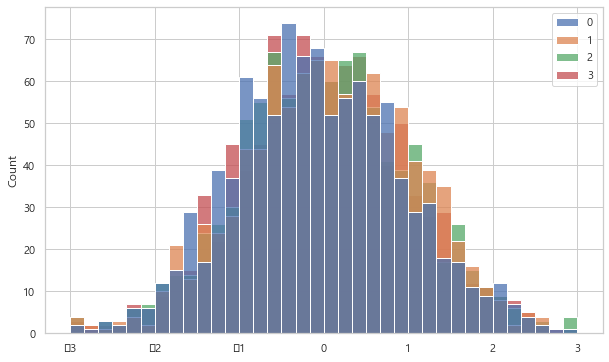

In [53]:
sns.histplot(data=data)

In [39]:
# Outliers 처리
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


<AxesSubplot:ylabel='Count'>

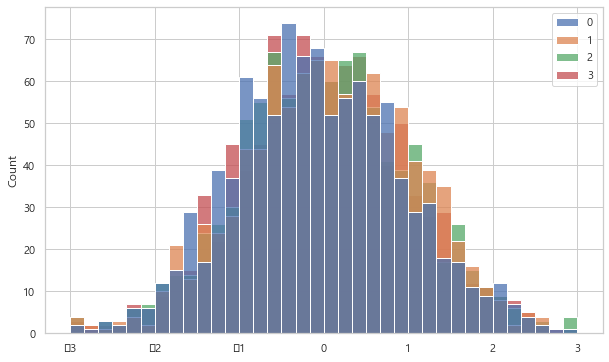

In [56]:
sns.histplot(data)

In [57]:
# np.sign() - 음수이면 -1.0, 양수이면 1.0, 0이면 0 반환
np.sign(data).head()

,0,1,2,3
0,-1.0,1.0,-1.0,-1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,-1.0
3,1.0,1.0,1.0,1.0
4,-1.0,-1.0,1.0,-1.0


### 치한과 샘플링 - Permutation and Random Sampling
* 무작위 행 sampling
  1. pandas.DataFrame.sample()
  2. numpy.random.permutation()
  3. sklearn.utils.shuffle()

In [60]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5)
sampler

array([1, 3, 0, 2, 4])

In [63]:
# take() - 입력된 축과 정수 인덱스에 해당하는 요소들을 반환
df.take(sampler)


,0,1,2,3
1,4,5,6,7
3,12,13,14,15
0,0,1,2,3
2,8,9,10,11
4,16,17,18,19


In [64]:
df.sample(n=3)

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
4,16,17,18,19


In [65]:
choices = pd.Series([5, 7, -1, 6, 4])
draws = choices.sample(n=10, replace=True)
draws

3    6
0    5
4    4
1    7
1    7
2   -1
3    6
0    5
1    7
2   -1
dtype: int64

### 표시자/더미 변수 계산하기 - Computing Indicator/Dummy Variables
* 데이터 분석시 범주데이터 문자를 관계성이 없는 숫자로 변경할 필요가 있음
  - 예시) 요일, 색깔 등
* pd.getdummies() - one-hot encoding 방식

In [71]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [77]:
# pd.get_dummies : 데이터를 one-hot encoding 으로 변환
# df['data1'] : Series 로 리턴
# df[['data1']] : DataFrame으로 리턴
# pd.join : 두개의 DataFrame을 합침
# df.join(df1, how='inner'|'outer', on='컬럼명' )
# df.join(df1) - df의 인덱스가 있는 것만 결과로 반환
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


#### 문자열 장르를 수치형 장르로 변경 

In [78]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames)
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [79]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [80]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [82]:
# 리스트 extend() - 리스트에 리스트를 추가하면 한개의 리스트로 반환
# 리스트 append() - 리스트에 리스트를 추가하면 리스트 자체가 추가된 리스트를 반환
# x.split('|') - split 된 요소를 리스트로 반환 
# pd.unique() - 유일값 반환
all_genres = []
for x in movies.genres:
    all_genres.extend(x.split('|'))
genres = pd.unique(all_genres)
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [85]:
zero_matrix = np.zeros((len(movies), len(genres)))
dummies = pd.DataFrame(zero_matrix, columns=genres)

In [87]:
gen = movies.genres[0]
gen.split('|')
dummies.columns.get_indexer(gen.split('|'))

array([0, 1, 2], dtype=int64)

In [88]:
dummies.columns

Index(['Animation', 'Children's', 'Comedy', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi',
       'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western'],
      dtype='object')

In [89]:
gen.split('|')

['Animation', "Children's", 'Comedy']

In [93]:
gen = movies.genres[1]
gen.split('|')
dummies.columns.get_indexer(gen.split('|'))

array([3, 1, 4], dtype=int64)

In [96]:
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

In [99]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.head()

,movie_id,title,genres,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Adventure,Genre_Fantasy,Genre_Romance,Genre_Drama,...,Genre_Crime,Genre_Thriller,Genre_Horror,Genre_Sci-Fi,Genre_Documentary,Genre_War,Genre_Musical,Genre_Mystery,Genre_Film-Noir,Genre_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
values = np.random.rand(10)
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,0,1,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,1,0,0,0,0


## 문자열 다루기 - String Manupulation

### 문자열 객체 메서드

In [118]:
# 문자열 분리
val = 'a,b,  guido'
val.split(',')

['a', 'b', '  guido']

In [119]:
# 공백문자 제거
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [121]:
first, second, third = pieces
first + '::' + second + '::' + third  # 문자열 합치기

'a::b::guido'

In [122]:
'::'.join(pieces)  # 문자열 join()

'a::b::guido'

In [134]:
'guido' in val   # val에 'guido' 가 있는지
val.index(',')   # 첫번째 ','의 index 출력
val.index(':')   # 해당 문자가 없는 경우 ValueError 출력
val.find(':')    # 찾고자 하는 문자가 있으면 index, 없으면 -1 반환 

-1

In [138]:
val.count(',')  # 대상문자의 갯수
val.count(':')  # 대상문자가 없는 경우 0

0

In [141]:
val.replace(',','::')
val.replace(',','')
val.replace(':','::')  # 대상문자가 없는 경우 원래 문자 반환

'a,b,  guido'

### 정규 표현식 - Regular Expressions

In [142]:
# \s+ - \s(공백문자), +(\s가 한번 이상 반복)
import re
text = "foo    bar\t baz  \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [143]:
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [144]:
regex.findall(text)

['    ', '\t ', '  \t']

In [166]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

# re.IGNORECASE makes the regex case-insensitive - 대소문자 구분없이 매치 
regex = re.compile(pattern, flags=re.IGNORECASE)

In [167]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

#### re.search()
* 일치하는 첫번째 위치를 반환
* 문자열의 처음과 일치해야 하는 것은 아님
  * re.match()는 문자열의 처음부터 일치해야 함
* 시작 인덱스와 마지막 인덱스를 반환

In [168]:
m = regex.search(text)
text[m.start():m.end()]

'dave@google.com'

#### re.match()
* 문자열의 처음부터 시작하여 패턴이 일치되는 것을 확인
  * 매치 결과를 출력하지 않고 match Object 반환
  * 매치되는 것이 없을 때에는 None 반환


In [169]:
print(regex.match(text)) # 정규 표현 패턴이 문자열의 시작점에서부터 일치하는지 검사, 시작점이 아니므로 None 반환

None


#### re.sub() - 문자열 치환
* 패턴 일치된 문자열을 새로운 문자열로 대체하고, 대체된 원본 문서를 반환

In [170]:
print(regex.sub('REDACTED', text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [177]:
# 이메일 주소를 3가지 컴포넌트로 나눠야 한다면 각 패턴을 괄호로 묶어줌
# 위의 e-mail 주소 패턴과 다른것은 괄호가 추가됨
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [178]:
# 처음부터 시작하는 문자열과 패턴이 일치하여 찾음
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [179]:
regex.findall(text) 

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [159]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



### 판다스에서 벡터화된 문자열 함수 - Vectorized String Functions in pandas

In [180]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [181]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [188]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [192]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [195]:
# Error ???    
matches.str.get(1)
# matches.str[0]

AttributeError: Can only use .str accessor with string values!

In [202]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

# 데이터 조인, 병합, 변형 - Data Wrangling: Join, Combine

## 계층적 인덱스 - hierarchical Indexing

In [214]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

a  1    0.758363
   2   -0.660524
   3    0.862580
b  1   -0.010032
   3    0.050009
c  1    0.670216
   2    0.852965
d  2   -0.955869
   3   -0.023493
dtype: float64

In [215]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [216]:
data['b']
data['b':'c']
data.loc[['b','d']]

b  1   -0.010032
   3    0.050009
d  2   -0.955869
   3   -0.023493
dtype: float64

In [220]:
data.loc[:,2]
data.loc[:,2:3]

a  2   -0.660524
   3    0.862580
b  3    0.050009
c  2    0.852965
d  2   -0.955869
   3   -0.023493
dtype: float64

In [223]:
data.unstack()
data.unstack().stack()

a  1    0.758363
   2   -0.660524
   3    0.862580
b  1   -0.010032
   3    0.050009
c  1    0.670216
   2    0.852965
d  2   -0.955869
   3   -0.023493
dtype: float64

In [1]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [3]:
frame.index.names = ['key1','key2']
frame.columns.names = ['state','color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [4]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

### 계층의 순서를 바꾸고 정렬하기 - Reordering and Sorting Levels

In [5]:
frame.swaplevel('key1','key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [6]:
frame.sort_index(level=1) # level은 왼쪽부터 0, 1, 2 ... 로 증가함

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [237]:
frame.swaplevel(0,1).sort_index(level=0)  # swaplevel() 수행후 sort_index() 수행

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

### 계층별 요약 통계 - Summary Statistics by Levle

In [7]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [12]:
frame.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [13]:
frame.sum(level='color',axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

### Indexing with a DataFrame's columns

In [14]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [16]:
frame2 = frame.set_index((['c','d']))
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [17]:
# 컬럼을 인덱스로 만들면서 컬럼을 그대로 유지
frame.set_index(['c','d'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [18]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## Combining and Merging Datasets

### Database-Style DataFrame Joins

In [21]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
display('df1', 'df2')

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6
,key,data2
0,a,0
1,b,1


In [24]:
pd.merge(df1, df2) # on 옵션이 없으므로 key로 join
                   # default, how='inner'
                   # pd.merge(df1, df2, on='key'과 동일)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [25]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [26]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})
display('df3','df4')

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6
,rkey,data2
0,a,0
1,b,1


In [27]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [29]:
print(display('df1','df2'))
pd.merge(df1, df2, how='outer')


df1
  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6

df2
  key  data2
0   a      0
1   b      1
2   d      2


,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [30]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})
display('df1','df2')

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5
,key,data2
0,a,0
1,b,1
2,a,2


In [31]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [32]:
pd.merge(df1, df2, how='inner')


,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [33]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})
display('left','right')

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3
,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [34]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')


,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [35]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [36]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))


,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### Merging on Index

In [37]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
display('left1','right1')

left1
  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5

right1
   group_val
a        3.5
b        7.0

In [38]:
# default, how='inner'
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [39]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [40]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                              'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])
display('lefth','righth')

lefth
     key1  key2  data
0    Ohio  2000   0.0
1    Ohio  2001   1.0
2    Ohio  2002   2.0
3  Nevada  2001   3.0
4  Nevada  2002   4.0

righth
             event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [44]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [45]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [47]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
display('left2','right2')

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0
,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [48]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [49]:
# index 로 Join 시 사용
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [50]:
# left1는 인덱스, right1은 커럼
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [52]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])
display('left2','right2','another')

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0
,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0
,New York,Oregon
a,7.0,8.0


In [53]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [54]:
left2.join([right2, another], how='outer')


,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0
b,NaN,NaN,7.0,8.0,NaN,NaN
d,NaN,NaN,11.0,12.0,NaN,NaN
f,NaN,NaN,NaN,NaN,16.0,17.0


### Concatenating Along Axis

In [55]:
arr = np.arange(12).reshape((3, 4))
np.concatenate([arr, arr], axis = 1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [56]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [57]:
pd.concat([s1, s2, s3])


a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [58]:
pd.concat([s1, s2, s3], axis=1)


,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [59]:
s4 = pd.concat([s1, s3])
print(s4)
pd.concat([s1, s4], axis=1)

a    0
b    1
f    5
g    6
dtype: int64


,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [60]:
s1, s4

(a    0
 b    1
 dtype: int64,
 a    0
 b    1
 f    5
 g    6
 dtype: int64)

In [61]:
pd.concat([s1, s4], axis=1, join='inner')


,0,1
a,0,0
b,1,1


In [65]:
# pandas 1.0 이상 버전에서 join_axes 삭제됨
# pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

In [66]:
s1, s3

(a    0
 b    1
 dtype: int64,
 f    5
 g    6
 dtype: int64)

In [69]:
# Multi index 생성
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [70]:
result.unstack()


,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [71]:
s1, s2, s3

(a    0
 b    1
 dtype: int64,
 c    2
 d    3
 e    4
 dtype: int64,
 f    5
 g    6
 dtype: int64)

In [73]:
# Series를 DataFrame 전환하면서 컬럼명 지정
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])


,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [74]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                   columns=['three', 'four'])
display('df1','df2')

,one,two
a,0,1
b,2,3
c,4,5
,three,four
a,5,6
c,7,8


In [76]:
# DataFrame 의 멀티 컬럼 인덱스 생성
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [77]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [78]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'], names=['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [79]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
display('df1','df2')


df1
          a         b         c         d
0 -0.204708  0.478943 -0.519439 -0.555730
1  1.965781  1.393406  0.092908  0.281746
2  0.769023  1.246435  1.007189 -1.296221

df2
          b         d         a
0  0.274992  0.228913  1.352917
1  0.886429 -2.001637 -0.371843

In [80]:
# index 새로 생성
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,1.352917,0.274992,NaN,0.228913
4,-0.371843,0.886429,NaN,-2.001637


### Combining Data with Overlap

In [81]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b = pd.Series(np.arange(len(a), dtype=np.float64),
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
a,b

(f    NaN
 e    2.5
 d    NaN
 c    3.5
 b    4.5
 a    NaN
 dtype: float64,
 f    0.0
 e    1.0
 d    2.0
 c    3.0
 b    4.0
 a    NaN
 dtype: float64)

In [82]:
# np.where(조건, 참일때 값, 거짓일때 값)
# 조건문 처럼 사용 가능
# 단독사용 - np.where(a>1) : 만족하는 경우 index 반환
np.where(pd.isnull(a), b, a)


array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [84]:
b[:-2], a[2:]

(f    0.0
 e    1.0
 d    2.0
 c    3.0
 dtype: float64,
 d    NaN
 c    3.5
 b    4.5
 a    NaN
 dtype: float64)

In [83]:
# 값 대치하기
# b값 있으면 그대로 사용하고 b에 없는 값이 a에 있으면 추가
# b값에 Null 있으면 a값으로 대치
b[:-2].combine_first(a[2:])


a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [87]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b': [np.nan, 2., np.nan, 6.],
                    'c': range(2, 18, 4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                    'b': [np.nan, 3., 4., 6., 8.]})
display('df1','df2')

df1
     a    b   c
0  1.0  NaN   2
1  NaN  2.0   6
2  5.0  NaN  10
3  NaN  6.0  14

df2
     a    b
0  5.0  NaN
1  4.0  3.0
2  NaN  4.0
3  3.0  6.0
4  7.0  8.0

In [88]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## Reshaping and Pivoting

### Reshaping with Hierarchical Indexing

In [89]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                    name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [90]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [91]:
result.unstack()


number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [92]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [93]:
result.unstack('state')


state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [94]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [95]:
data2.unstack()


,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [98]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [99]:
df = pd.DataFrame({'left': result, 'right': result + 5},
                  columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [100]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [101]:
df.unstack('state').stack('side')


state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

### Pivoting "Long" to "Wide" Format

In [127]:
data = pd.read_csv('examples/macrodata.csv')

periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
data = data.reindex(columns=columns)
data.index = periods.to_timestamp('D', 'end')
data

item,realgdp,infl,unemp
date,,,
1959-03-31 23:59:59.999999999,2710.349,0.00,5.8
1959-06-30 23:59:59.999999999,2778.801,2.34,5.1
1959-09-30 23:59:59.999999999,2775.488,2.74,5.3
1959-12-31 23:59:59.999999999,2785.204,0.27,5.6
1960-03-31 23:59:59.999999999,2847.699,2.31,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,13324.600,-3.16,6.0
2008-12-31 23:59:59.999999999,13141.920,-8.79,6.9
2009-03-31 23:59:59.999999999,12925.410,0.94,8.1


In [128]:
ldata = data.stack().reset_index().rename(columns={0: 'value'})

In [121]:
ldata[:10]

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
5,1959-06-30 23:59:59.999999999,unemp,5.100
6,1959-09-30 23:59:59.999999999,realgdp,2775.488
7,1959-09-30 23:59:59.999999999,infl,2.740
8,1959-09-30 23:59:59.999999999,unemp,5.300
9,1959-12-31 23:59:59.999999999,realgdp,2785.204


In [129]:
pivoted = ldata.pivot('date','item','value')
pivoted

value                 
item                           infl    realgdp unemp
date                                                
1959-03-31 23:59:59.999999999  0.00   2710.349   5.8
1959-06-30 23:59:59.999999999  2.34   2778.801   5.1
1959-09-30 23:59:59.999999999  2.74   2775.488   5.3
1959-12-31 23:59:59.999999999  0.27   2785.204   5.6
1960-03-31 23:59:59.999999999  2.31   2847.699   5.2
...                             ...        ...   ...
2008-09-30 23:59:59.999999999 -3.16  13324.600   6.0
2008-12-31 23:59:59.999999999 -8.79  13141.920   6.9
2009-03-31 23:59:59.999999999  0.94  12925.410   8.1
2009-06-30 23:59:59.999999999  3.37  12901.504   9.2
2009-09-30 23:59:59.999999999  3.56  12990.341   9.6

[203 rows x 3 columns]

In [132]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,0.022074
1,1959-03-31 23:59:59.999999999,infl,0.000,-1.369179
2,1959-03-31 23:59:59.999999999,unemp,5.800,0.887204
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,0.014331
4,1959-06-30 23:59:59.999999999,infl,2.340,-0.074155
5,1959-06-30 23:59:59.999999999,unemp,5.100,-0.048565
6,1959-09-30 23:59:59.999999999,realgdp,2775.488,1.235021
7,1959-09-30 23:59:59.999999999,infl,2.740,-0.433295
8,1959-09-30 23:59:59.999999999,unemp,5.300,1.391035
9,1959-12-31 23:59:59.999999999,realgdp,2785.204,0.820211


In [133]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -1.369179  0.022074   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1 -0.074155  0.014331   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3 -0.433295  1.235021   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -0.247423  0.820211   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2 -0.942369  0.543980   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.887204  
1959-06-30 23:59:59.999999999 -0.048565  
1959-09-30 23:59:59.999999999  1.391035  
1959-12-31 23:59:59.999999999  0.302271  
1960-03-31 23:59:59.999999999 -1.266383

In [134]:
pivoted['value'][:5]


item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


In [135]:
ldata

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,0.022074
1,1959-03-31 23:59:59.999999999,infl,0.000,-1.369179
2,1959-03-31 23:59:59.999999999,unemp,5.800,0.887204
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,0.014331
4,1959-06-30 23:59:59.999999999,infl,2.340,-0.074155
...,...,...,...,...
604,2009-06-30 23:59:59.999999999,infl,3.370,1.213586
605,2009-06-30 23:59:59.999999999,unemp,9.200,-0.638036
606,2009-09-30 23:59:59.999999999,realgdp,12990.341,-0.373945
607,2009-09-30 23:59:59.999999999,infl,3.560,-0.053432


In [ ]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

In [140]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]


value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -1.369179  0.022074   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1 -0.074155  0.014331   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3 -0.433295  1.235021   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -0.247423  0.820211   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2 -0.942369  0.543980   
1960-06-30 23:59:59.999999999  0.14  2834.390   5.2 -0.720102  0.937250   
1960-09-30 23:59:59.999999999  2.70  2839.022   5.6 -0.958704 -0.375498   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.887204  
1959-06-30 23:59:59.999999999 -0.048565  
1959-09-30 23:59:59.999999999  1.391035  
1959-12-31 23:59:59.999999999  0.302271  
1960-03-31 23:59:59.999999999 -1.266383  
1960-06-30 23:59:59.999999999 -1.593952  
1960-09-30 23:59:59.999999999  0.794336

### Pivoting "Wide" to "Long" Format

In [141]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [143]:
melted = pd.melt(df,['key'])
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [144]:
reshaped = melted.pivot('key', 'variable', 'value')
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [145]:
reshaped.reset_index()


variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [146]:
pd.melt(df, id_vars=['key'], value_vars=['A', 'B'])


,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [147]:
pd.melt(df, value_vars=['A', 'B', 'C'])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


In [148]:
pd.melt(df, value_vars=['key', 'A', 'B'])


,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6


# Plotting and Visualization

## matplotlib API 간략하게 살펴보기 - A Brief matplotlib API Primer

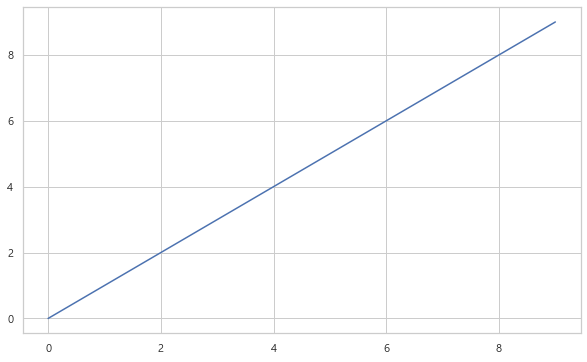

In [150]:
data = np.arange(10)
plt.plot(data)

### Figures and Subplots

In [10]:
# matplotlib에서 그래프는 Figure 객체내에 존재
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [11]:
# subslot 생성
# figure가 2 x 2 크기이고 4개중 첫번째를 선택
ax1 = fig.add_subplot(2, 2, 1)

In [12]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

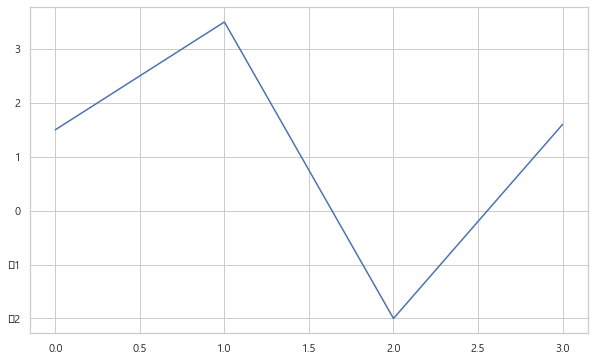

In [18]:
plt.plot([1.5, 3.5, -2, 1.6])

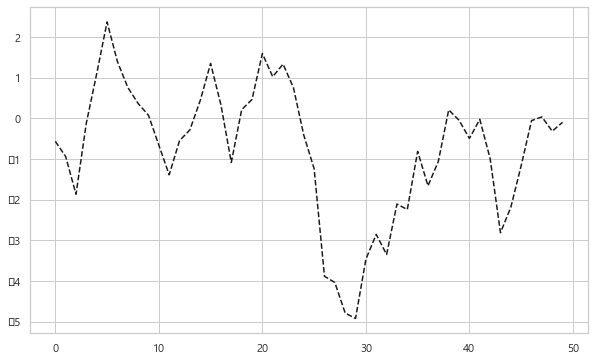

In [19]:
# 'k--' 스타일 옵션- 검은 점선
plt.plot(np.random.randn(50).cumsum(), 'k--')


In [20]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [21]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))


In [22]:
plt.close('all')


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

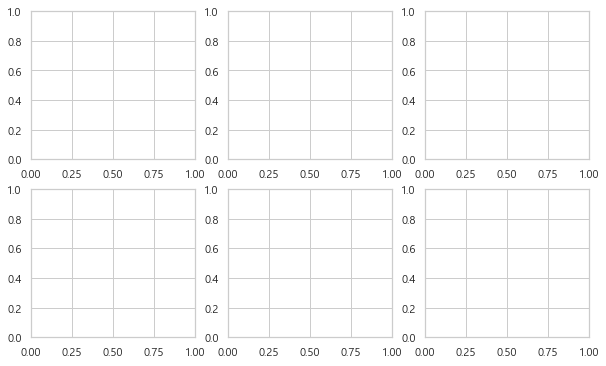

In [23]:
fig, axes = plt.subplots(2, 3)
axes

### 서브플롯간의 간격 조정 - Adjusting the spacing around subplots

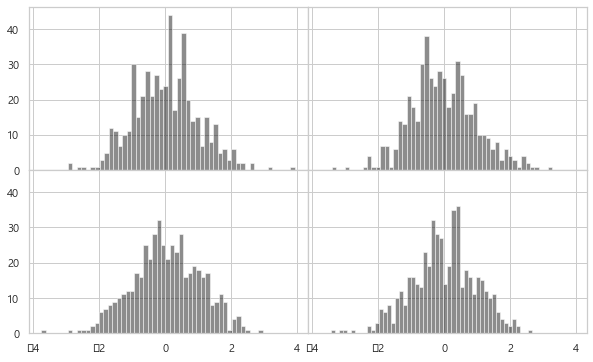

In [26]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 색상, 마커, 선 스타일 - Colors, Markers, and Line Style

In [28]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

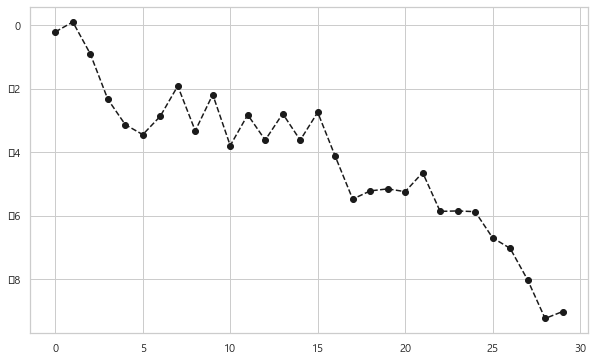

In [36]:
# 실무에서는 명시적인 방법을 사용
from numpy.random import randn
# plt.plot(randn(30).cumsum(), 'ko--')
plt.plot(randn(30).cumsum(), linestyle='--', color='k', marker='o')


In [30]:
plt.close('all')

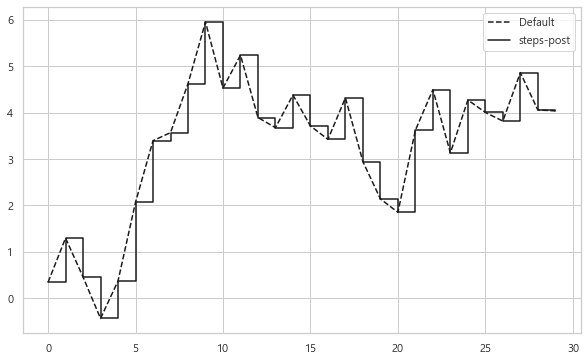

In [40]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')



### 눈금, 라벨, 범례 - Ticks, Labels, Legends

#### 제목, 축 이름, 눈금, 눈금 이름 설정하기 - Setting the title, axis labels, ticks, and ticklabels

Text(0.5, 0, 'Stages')

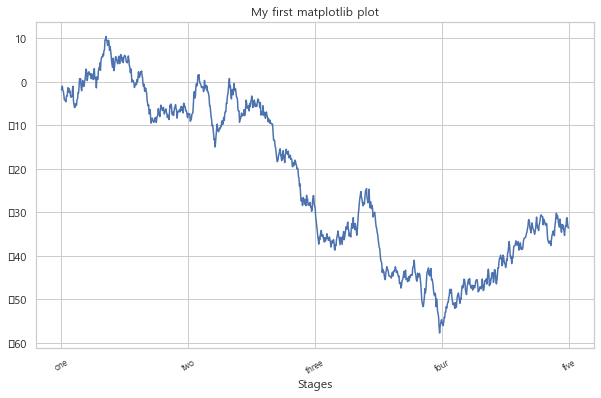

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000]) # x축 눈금 지정

labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small') # x축 이름 설정
ax.set_title('My first matplotlib plot') # Title 설정
ax.set_xlabel('Stages')   # x축 이름 설정      


[Text(0.5, 1.0, 'My first matplotlib plot'), Text(0.5, 0, 'Stages')]

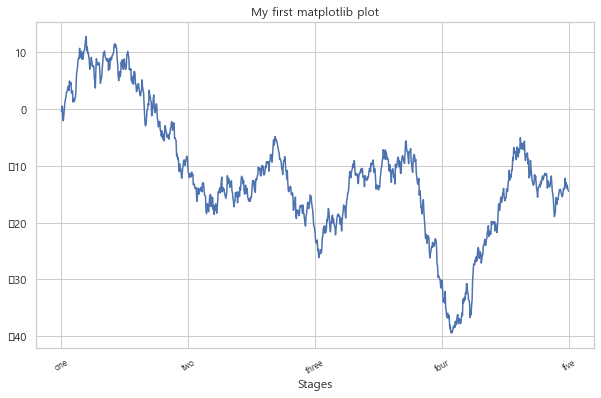

In [52]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000]) # x축 눈금 지정
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small') # x축 이름 설정
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

#### 범례 추가하기 - Adding legends

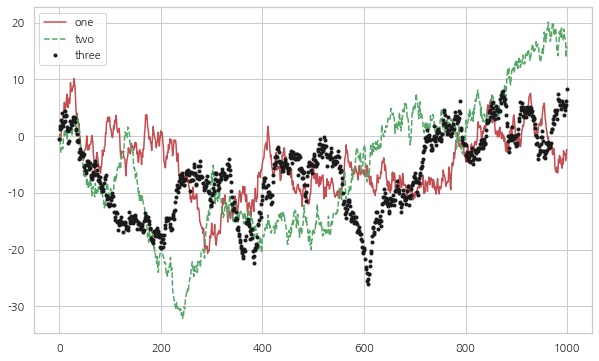

In [104]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'r', label='one')
ax.plot(randn(1000).cumsum(), 'g--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

#### 주석과 그림 추가하기 - Annotations and Drawing on a Subplot

Text(0.5, 1.0, '중요한 Important dates in the 2008-2009 financial crisis')

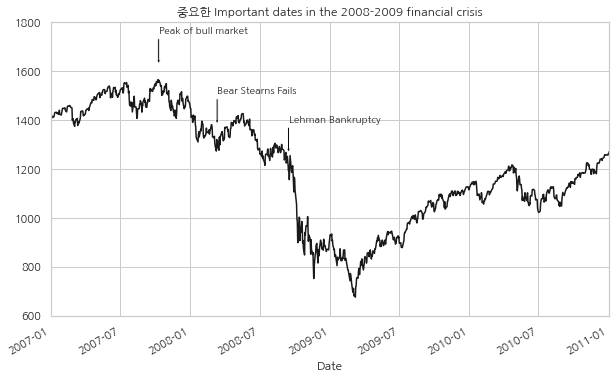

In [98]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

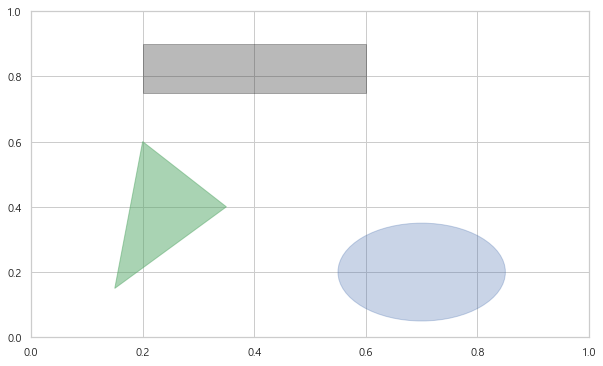

In [83]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 그래프를 파일로 저장하기 - Saving Plots to File

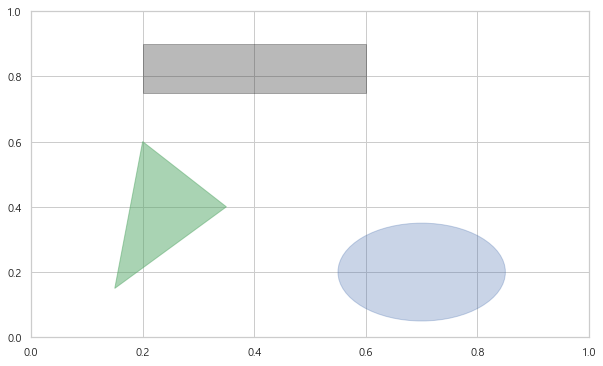

In [87]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

plt.savefig('graph.jpg', dpi=400, bbox_inches='tight') # 파일로 저장

### matplotlib 설정 - matplotlib Configuration
matplotlib 설정은 많은 전역 인자를 통해 그래프 크기, 서브플롯 간격, 색상, 글자 크기, 격자 스타일 등을 설정할 수 있다.

matplotlib 환경 설정 시스템은 두 가지 방법이 있다

* rc메서드를 사용해서 프로그램밍적으로 설정
   ```python
   plt.rc('figure', figsize=(10,10))
   ```


   ```python
   font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
   plt.rc('font', **font_options) 
   ```

홈 디렉러리에 .matplotlibrc라는 이름으로 저장해 두면 matplotlib을 사용할 때마다 불러오게 된다. 

## pandas에서 seaborn으로 그래프 그리기 - Plotting with pandas and seaborn

### 선그래프 - Line Plots

<AxesSubplot:>

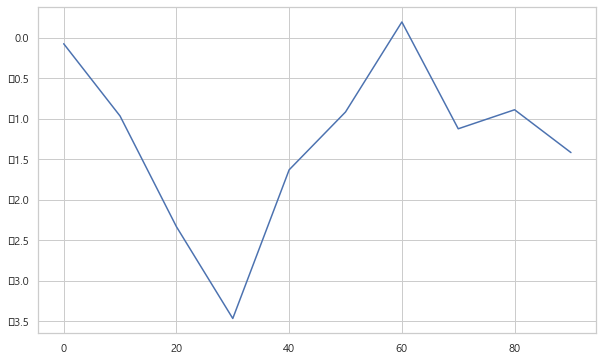

In [91]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<AxesSubplot:>

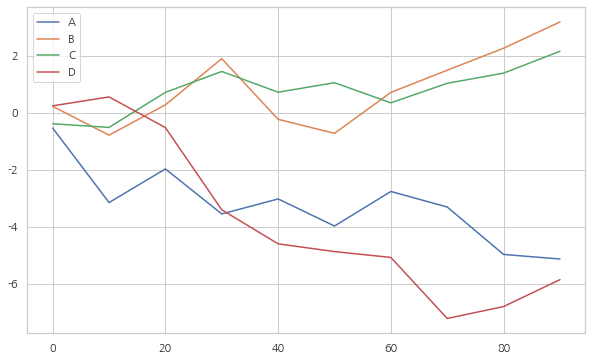

In [107]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### 막대 그래프 - Bar Plots
plot.bar() - 수직막대 그래프, plot.barh() - 수평막대 그래프

<AxesSubplot:>

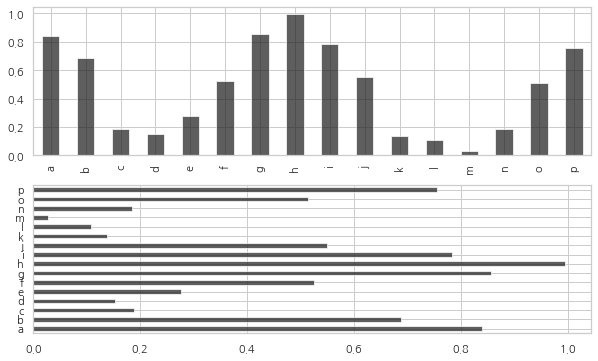

In [108]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

<AxesSubplot:>

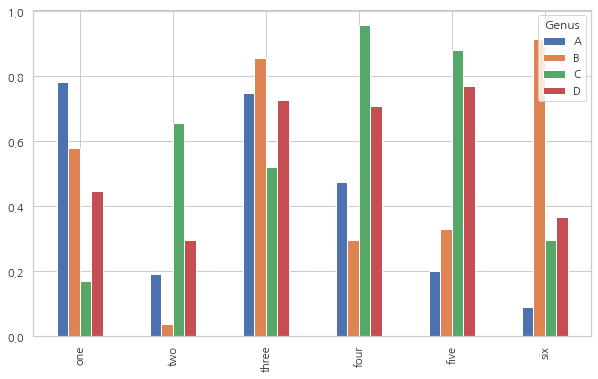

In [109]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar()

<AxesSubplot:>

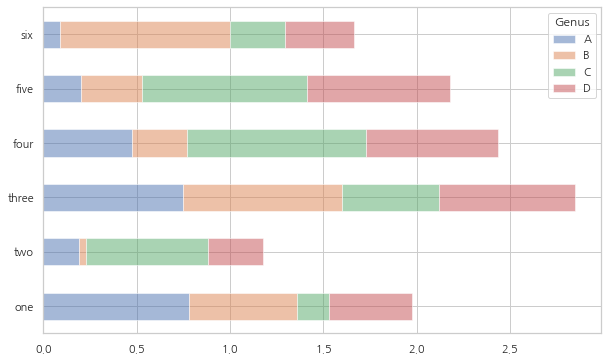

In [111]:
# stacked=True - 누적막대 그래프 
df.plot.barh(stacked=True, alpha=0.5) 

In [13]:
# pd.crosstab() - 빈도수 반환
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

In [14]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
# party_pcts.plot.bar()

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

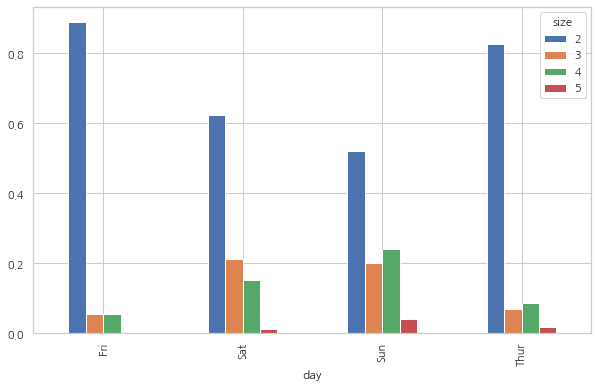

In [15]:
# Normalize to sum to 1
# [참조] pd.div() - https://kongdols-room.tistory.com/126
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

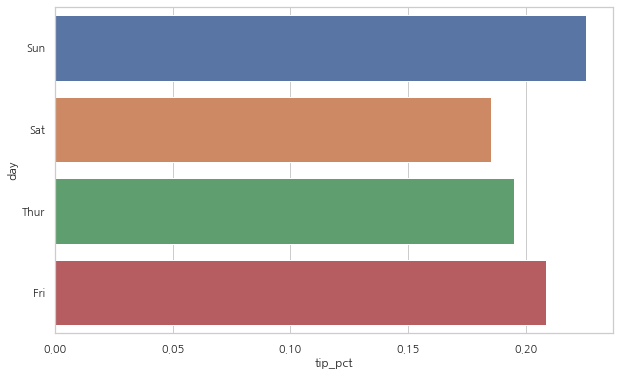

In [16]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h', ci=None)

In [136]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

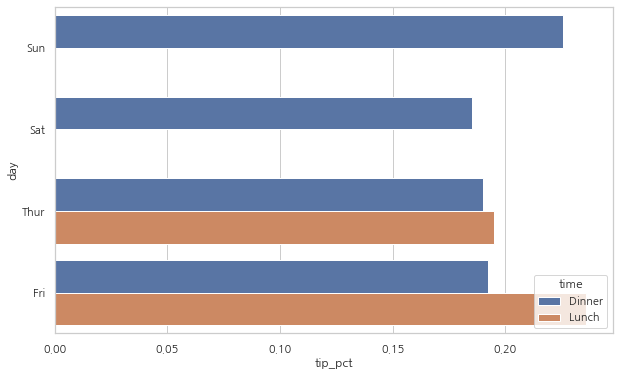

In [135]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h', ci=None)

### 히스토그램과 밀도 그래프 - Histograms and Density Plots
히스토그램은 막대그래프의 한 종류로, 값들의 빈도를 분리하여 보여준다

<AxesSubplot:ylabel='Frequency'>

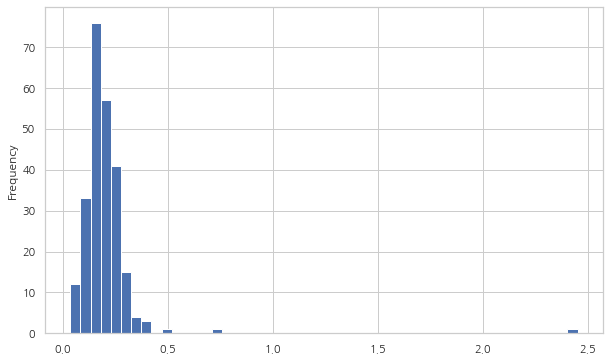

In [137]:
tips['tip_pct'].plot.hist(bins=50)


<AxesSubplot:ylabel='Density'>

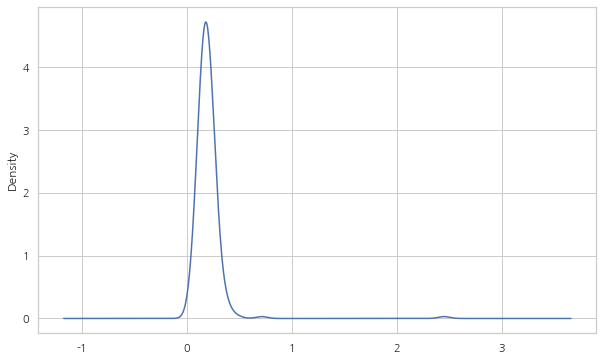

In [146]:
# 밀도 그래프
# ----------
관찰값을 사용해서 추정되는 연속된 확률분포를 그린다. 일반적인 과정은 kernel 메서드를 잘 섞어서 이분포를 근사하는 방법인데 이보다 단순한 정규분포다. 그래서 밀도그래프는 KDE(Kernel Density Estimate:커너밀도추정) 그래프라고도 알려져 있다.
tips['tip_pct'].plot.density()  


<AxesSubplot:ylabel='Density'>

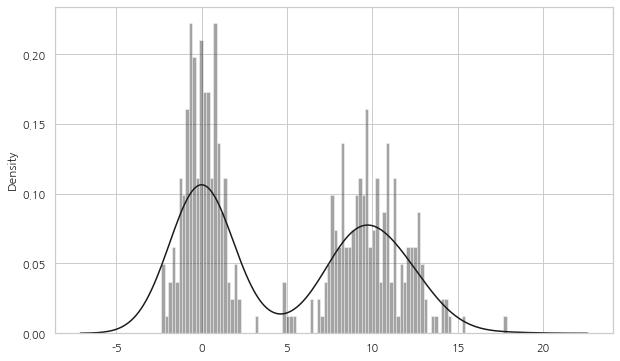

In [7]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

<AxesSubplot:ylabel='Density'>

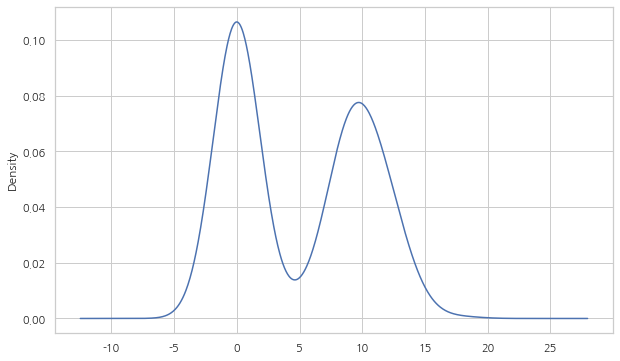

In [9]:
values.plot.density()

### 산포도 - Scatter or Point Plots
산포도는 두개의 1차원 데이터 묶음 간의 관계를 나타내고자 할 때 유용한 그래프이다.

In [10]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna() # 로그차 구하기
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

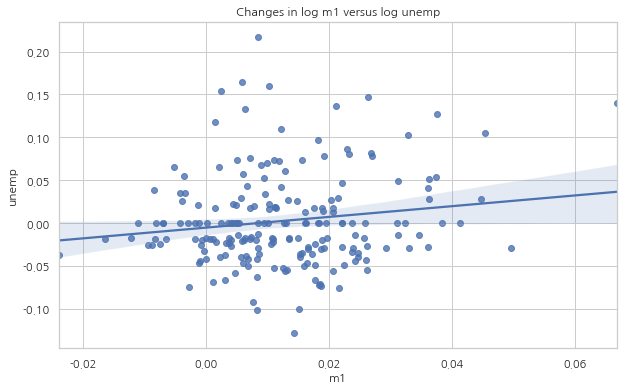

In [11]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

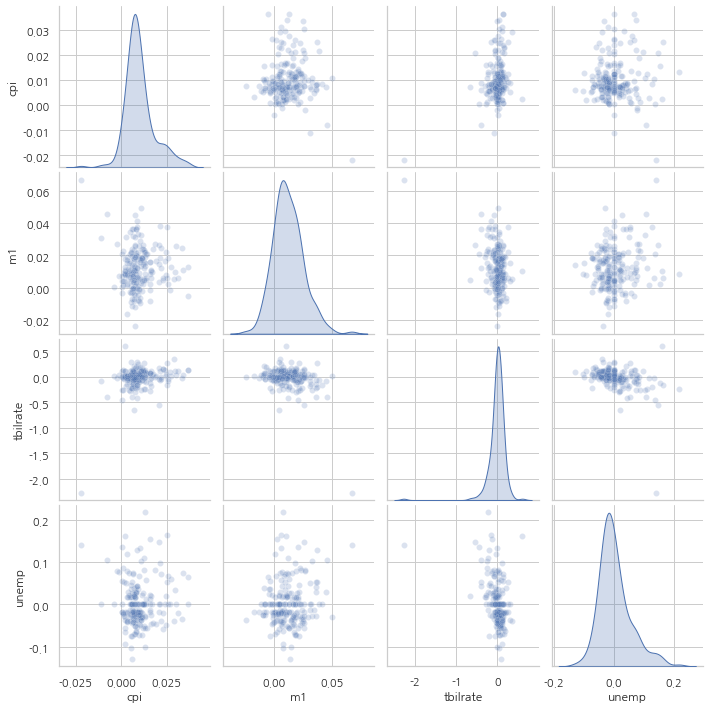

In [12]:
# plot_kws 인자는 각각의 그래프에 전달할 개별 설정값을 지정
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### 패싯 그리드와 범주형 데이터 - Facet Grids and Categorical Data
추가적인 그룹 차원을 가지는 데이터를 어떻게 시각화 할까? 다양한 범주형 값을 가지는 데이터를 시각화하는 한 가지 방법은 패싯 그리드를 이용하는 것이다.

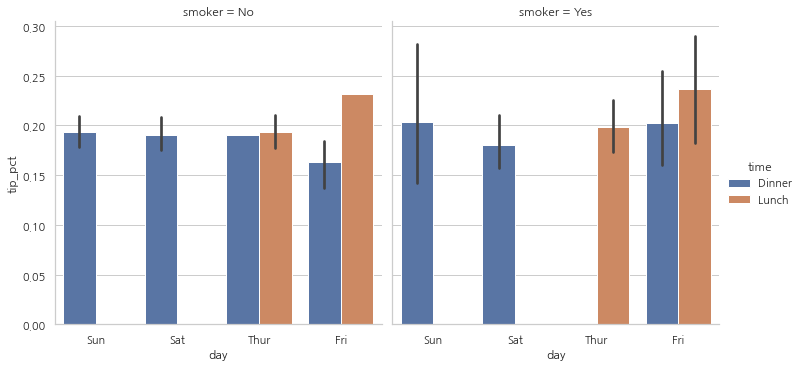

In [17]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

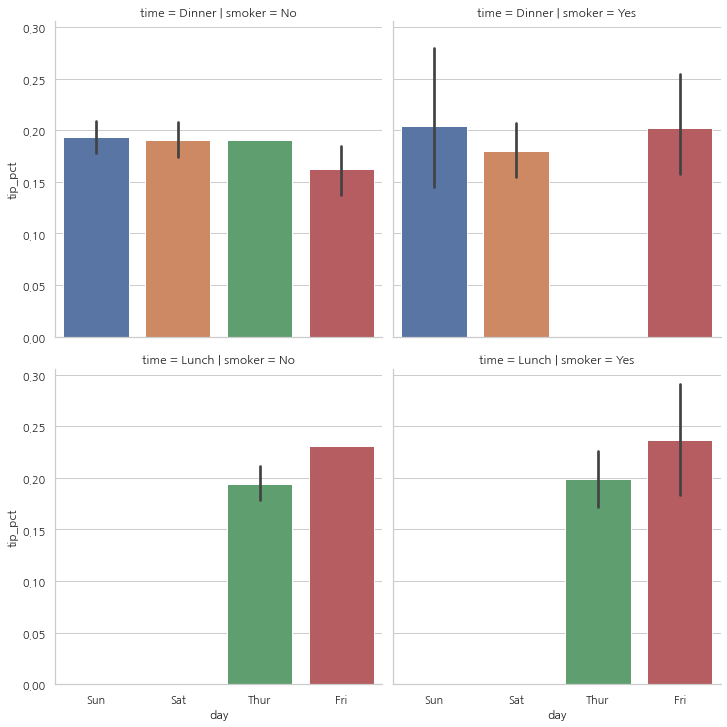

In [18]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

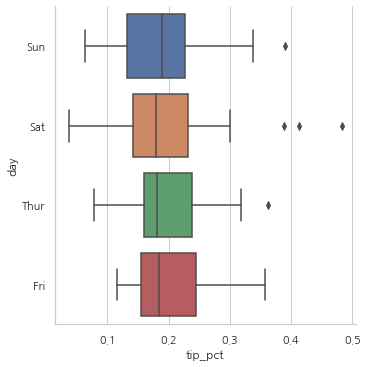

In [19]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

# 데이터 집계와 그룹 연산 - Data Aggregation and Group Operations

## GroupBy 메카닉 - GroupBy Mechanics

In [55]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,2.524409,-0.846122
1,a,two,-0.572612,0.735008
2,b,one,-0.522387,-0.080558
3,b,two,0.119679,1.040778
4,a,one,-0.025982,0.525507


In [21]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [22]:
grouped.mean()

key1
a    0.963563
b    0.173075
Name: data1, dtype: float64

In [24]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     1.178662
      two     0.533364
b     one     0.356266
      two    -0.010115
Name: data1, dtype: float64

In [25]:
means.unstack()

key2,one,two
key1,,
a,1.178662,0.533364
b,0.356266,-0.010115


In [26]:
# 별로도 key를 정해서 DataFrame을 groupby 할 수 있음
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005    0.533364
            2006    0.356266
Ohio        2005    0.465728
            2006    1.415753
Name: data1, dtype: float64

In [27]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.963563,0.152454
b,0.173075,-0.230133


In [28]:
df.groupby(['key1', 'key2']).mean()


data1     data2
key1 key2                    
a    one   1.178662  0.000438
     two   0.533364  0.456487
b    one   0.356266  0.194788
     two  -0.010115 -0.655054

### 그룹간 순회하기 - Iterating Over Groups

In [56]:
for name, group in df.groupby('key1'):
    print(name)
    print('~'*40)
    print(group)
    print('~'*40)

a
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  key1 key2     data1     data2
0    a  one  2.524409 -0.846122
1    a  two -0.572612  0.735008
4    a  one -0.025982  0.525507
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
b
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  key1 key2     data1     data2
2    b  one -0.522387 -0.080558
3    b  two  0.119679  1.040778
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [57]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print('~'*40)
    print(group)
    print('~'*40)

('a', 'one')
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  key1 key2     data1     data2
0    a  one  2.524409 -0.846122
4    a  one -0.025982  0.525507
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
('a', 'two')
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  key1 key2     data1     data2
1    a  two -0.572612  0.735008
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
('b', 'one')
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  key1 key2     data1     data2
2    b  one -0.522387 -0.080558
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
('b', 'two')
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  key1 key2     data1     data2
3    b  two  0.119679  1.040778
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [58]:
# 그룹별 데이터를 사전형으로 바꿔서 유용하게 사용
# 그룹중 일부 그룹데이터를 활용할 수 있음
pieces = dict(list(df.groupby('key1')))
pieces['b']

,key1,key2,data1,data2
2,b,one,-0.522387,-0.080558
3,b,two,0.119679,1.040778


In [59]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [63]:
# 컬럼 기준 groupby
print(df.dtypes)
grouped = df.groupby(df.dtypes, axis=1)

key1      object
key2      object
data1    float64
data2    float64
dtype: object


In [64]:
df

,key1,key2,data1,data2
0,a,one,2.524409,-0.846122
1,a,two,-0.572612,0.735008
2,b,one,-0.522387,-0.080558
3,b,two,0.119679,1.040778
4,a,one,-0.025982,0.525507


In [65]:
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0  2.524409 -0.846122
1 -0.572612  0.735008
2 -0.522387 -0.080558
3  0.119679  1.040778
4 -0.025982  0.525507
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


In [67]:
grouped.sum()

,float64,object
0,1.678287,aone
1,0.162396,atwo
2,-0.602945,bone
3,1.160457,btwo
4,0.499525,aone


In [11]:
### 컬럼이나 컬럼의 일부만 선택하기 - Selecting a Column or Subset of Columns


In [73]:
# 대용량 데이터를 다룰 경우 소수의 컬럼만 집계하고 싶을때 사용
# DataFrame으로 반환
df.groupby(['key1', 'key2'])[['data1']].mean()

data1
key1 key2          
a    one   1.249214
     two  -0.572612
b    one  -0.522387
     two   0.119679

In [17]:
df[['data1']].groupby([df['key1'],df['key2']]).mean()

data1
key1 key2          
a    one   0.880536
     two   0.478943
b    one  -0.519439
     two  -0.555730

In [20]:
# Series 로 반환
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped
s_grouped.mean()

key1  key2
a     one     1.319920
      two     0.092908
b     one     0.281746
      two     0.769023
Name: data2, dtype: float64

### 사전과 Series에서 그룹핑하기 - Grouping with Dicts and Series

In [21]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

,a,b,c,d,e
Joe,1.007189,-1.296221,0.274992,0.228913,1.352917
Steve,0.886429,-2.001637,-0.371843,1.669025,-0.438570
Wes,-0.539741,NaN,NaN,-1.021228,-0.577087
Jim,0.124121,0.302614,0.523772,0.000940,1.343810
Travis,-0.713544,-0.831154,-2.370232,-1.860761,-0.860757


In [22]:
# 'a','b','e' - 'red', 'c', 'd' - blue
# 세로축의 그룹으로 나누어 집계
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [23]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,0.503905,1.063885
Steve,1.297183,-1.553778
Wes,-1.021228,-1.116829
Jim,0.524712,1.770545
Travis,-4.230992,-2.405455


In [24]:
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [25]:
people.groupby(map_series, axis=1).count()


,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### 함수로 그룹핑 - Grouping with Functions

In [26]:
people

,a,b,c,d,e
Joe,1.007189,-1.296221,0.274992,0.228913,1.352917
Steve,0.886429,-2.001637,-0.371843,1.669025,-0.438570
Wes,-0.539741,NaN,NaN,-1.021228,-0.577087
Jim,0.124121,0.302614,0.523772,0.000940,1.343810
Travis,-0.713544,-0.831154,-2.370232,-1.860761,-0.860757


In [27]:
people.groupby(len).sum()

,a,b,c,d,e
3,0.591569,-0.993608,0.798764,-0.791374,2.119639
5,0.886429,-2.001637,-0.371843,1.669025,-0.438570
6,-0.713544,-0.831154,-2.370232,-1.860761,-0.860757


In [28]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -0.539741 -1.296221  0.274992 -1.021228 -0.577087
  two  0.124121  0.302614  0.523772  0.000940  1.343810
5 one  0.886429 -2.001637 -0.371843  1.669025 -0.438570
6 two -0.713544 -0.831154 -2.370232 -1.860761 -0.860757

In [ ]:
### index 단계로 그룹핑 하기 - Grouping by Index Levels

In [29]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.560145 -1.265934  0.119827 -1.063512  0.332883
1     -2.359419 -0.199543 -1.541996 -0.970736 -1.307030
2      0.286350  0.377984 -0.753887  0.331286  1.349742
3      0.069877  0.246674 -0.011862  1.004812  1.327195

In [30]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


### 데이터 집계 - Data Aggregation

In [32]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.919262,0.862580
1,a,two,-1.549106,-0.010032
2,b,one,0.022185,0.050009
3,b,two,0.758363,0.670216
4,a,one,-0.660524,0.852965


In [33]:
# 백분위수(Percentile)는 오름차순 정렬했을 때 0을 최소값, 100을 최대값으로 백분율로 나타낸 특정 위치 값입니다. 따라서 사분위수는 25, 50, 75를 기준 점으로 나눠져 1분위부터 4분위까지 존재
# pandas 함수명은 quantile( ), numpy 함수명은 percentile( )

# pandas의 quantile함수의 q(백분위수)는 0과 1사이 값을 입력하고

# numpy의 percentile함수의 q(백분위수)는 0과 100사이 값을 입력합니다. 

# 따라서 중앙값을 구할때 quantile( ) q값을 0.5, percentile( ) q값을 50으로 입력

grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a   -0.712272
b    0.684745
Name: data1, dtype: float64

In [34]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,0.888582,0.872612
b,0.736179,0.620206


In [35]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0 -1.042964  0.457024 -1.549106 -1.234184 -0.919262 -0.789893   
b      2.0  0.390274  0.520557  0.022185  0.206229  0.390274  0.574319   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a    -0.660524   3.0  0.568504  0.501050 -0.010032  0.421467  0.852965   
b     0.758363   2.0  0.360112  0.438552  0.050009  0.205061  0.360112   

                          
           75%       max  
key1                      
a     0.857773  0.862580  
b     0.515164  0.670216

### 컬럼에 여러 가지 함수 적용하기 - Column-Wise and Multiple Function Application

In [36]:
tips = pd.read_csv('examples/tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [37]:
grouped = tips.groupby(['day', 'smoker'])

In [39]:
grouped_pct = grouped['tip_pct']

In [45]:
grouped_pct.agg('mean')
# grouped_pct.mean()


day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [46]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [47]:
# 함수명(mean, np.std) 대신 별도의 컬럼명을 사용
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])


foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [48]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [52]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [53]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

In [54]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [55]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

### Indexes 되지 않은 형태(컬럼으로)로 집계된 데이터 반환하기 - Returning Aggregated Data without Row Indexes

In [56]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


## Apply: 일반적인 분리-적용-병합 - Apply: General split-apply-combine

In [57]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [58]:
tips.groupby('smoker').apply(top)


total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [59]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [60]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [61]:
result.unstack('smoker')


       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

### 그룹 키(GroupBy's Key) 생략하기 - Suppressing the Group Keys

In [62]:
# group_keys=False
# 그룹키를 인덱스로 사용하지 않고 원래 자리에 표현됨
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


### 변위치 분석과 버킷 분석 - Quantile and Bucket Analysis

In [13]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
quartiles = pd.cut(frame.data1, 4)
print(pd.value_counts(quartiles))
print('~'*40)
quartiles[:10]



(-0.06, 1.733]      481
(-1.853, -0.06]     456
(-3.653, -1.853]     34
(1.733, 3.526]       29
Name: data1, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0     (-0.06, 1.733]
1    (-1.853, -0.06]
2     (-0.06, 1.733]
3    (-1.853, -0.06]
4    (-1.853, -0.06]
5     (-0.06, 1.733]
6    (-1.853, -0.06]
7    (-1.853, -0.06]
8    (-1.853, -0.06]
9     (-0.06, 1.733]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.653, -1.853] < (-1.853, -0.06] < (-0.06, 1.733] < (1.733, 3.526]]

In [16]:
# cut를 이용하여 분류하고 분류기준으로 groupby 하여 집계
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

grouped = frame.data2.groupby(quartiles)
grouped.apply(get_stats).unstack()


,min,max,count,mean
data1,,,,
"(-3.653, -1.853]",-1.236664,2.135719,34.0,0.000529
"(-1.853, -0.06]",-3.018842,2.903300,456.0,0.007797
"(-0.06, 1.733]",-3.333767,2.771398,481.0,0.013224
"(1.733, 3.526]",-2.494075,1.676926,29.0,-0.078567


In [24]:
# pd.qcut(labels=None) : 구간으로 표시
# pd.qcut(labels=False) : 순위로 표시

# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
0,-3.018842,2.146716,100.0,-0.079868
1,-2.641014,2.038456,100.0,-0.047797
2,-2.453248,2.497899,100.0,0.128559
3,-2.901831,2.903300,100.0,0.050232
4,-2.251291,2.209647,100.0,-0.015985
5,-3.108915,2.497837,100.0,0.055541
6,-1.866563,2.771398,100.0,-0.013879
7,-3.333767,1.786051,100.0,0.030854
8,-2.428129,2.445125,100.0,0.036268


### Example: Filling Missing Values with Group-Specific Values

In [26]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
print(s)
print('~'*40)
s.fillna(s.mean())

0         NaN
1    0.868791
2         NaN
3    0.485218
4         NaN
5   -1.068808
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0    0.095067
1    0.868791
2    0.095067
3    0.485218
4    0.095067
5   -1.068808
dtype: float64

In [27]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data

Ohio          1.190359
New York     -1.053204
Vermont       0.776001
Florida       1.311260
Oregon        1.159677
Nevada        0.477395
California   -0.004493
Idaho         0.574631
dtype: float64

In [28]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
print(data)
print('~'*40)
data.groupby(group_key).mean()

Ohio          1.190359
New York     -1.053204
Vermont            NaN
Florida       1.311260
Oregon        1.159677
Nevada             NaN
California   -0.004493
Idaho              NaN
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


East    0.482805
West    0.577592
dtype: float64

In [37]:
# goupby를 통해 그룹간 평균을 구하여 Null값을 대체하고 원래의 DataFrame을 보여줌
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio          1.190359
New York     -1.053204
Vermont       0.482805
Florida       1.311260
Oregon        1.159677
Nevada        0.577592
California   -0.004493
Idaho         0.577592
dtype: float64

In [38]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio          1.190359
New York     -1.053204
Vermont       0.500000
Florida       1.311260
Oregon        1.159677
Nevada       -1.000000
California   -0.004493
Idaho        -1.000000
dtype: float64

### Example: Random Sampling and Permutation

In [49]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index=cards)
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [42]:
def draw(deck, n=5):
    return deck.sample(n)
draw(deck)

10H    10
7H      7
AC      1
6D      6
5H      5
dtype: int64

In [111]:
# 진짜 모르겠다???
# deck.grouppby(get_suit) - deck의 인덱스 value를 가져와서 get_suit로 전달
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2)

C  7C     7
   2C     2
D  4D     4
   QD    10
H  5H     5
   3H     3
S  5S     5
   KS    10
dtype: int64

In [ ]:
grouped.groups

for name, group in grouped:
    print(name)
    print('~'*40)
    print(group)

In [82]:
get_suit = lambda card: card[-1] # last letter is suit
# pieces = dict(list(deck.groupby(get_suit)))
list(deck.groupby(get_suit))

[('C',
  AC      1
  2C      2
  3C      3
  4C      4
  5C      5
  6C      6
  7C      7
  8C      8
  9C      9
  10C    10
  JC     10
  KC     10
  QC     10
  dtype: int64),
 ('D',
  AD      1
  2D      2
  3D      3
  4D      4
  5D      5
  6D      6
  7D      7
  8D      8
  9D      9
  10D    10
  JD     10
  KD     10
  QD     10
  dtype: int64),
 ('H',
  AH      1
  2H      2
  3H      3
  4H      4
  5H      5
  6H      6
  7H      7
  8H      8
  9H      9
  10H    10
  JH     10
  KH     10
  QH     10
  dtype: int64),
 ('S',
  AS      1
  2S      2
  3S      3
  4S      4
  5S      5
  6S      6
  7S      7
  8S      8
  9S      9
  10S    10
  JS     10
  KS     10
  QS     10
  dtype: int64)]

In [84]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

6C      6
4C      4
KD     10
10D    10
7H      7
4H      4
6S      6
8S      8
dtype: int64

### Example: Group Weighted Average and Correlation

In [85]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df

,category,data,weights
0,a,0.602572,0.785118
1,a,-0.586454,0.275612
2,a,3.442215,0.807852
3,a,-0.508829,0.827348
4,b,-0.071672,0.326786
5,b,-1.214938,0.391288
6,b,-1.501132,0.452457
7,b,-0.317488,0.449977


In [86]:
# np.average(weight=) 가중 평균
# sum(data * weight) / sum(weight) - 가중평균
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a    0.990856
b   -0.815097
dtype: float64

In [28]:
close_px = pd.read_csv('examples/stock_px_2.csv', parse_dates=True,
                       index_col=0)
print(close_px.info())
print('~'*40)
close_px[-4:]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [102]:
rets = close_px.pct_change().dropna()
rets

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386
...,...,...,...,...
2011-10-10,0.051406,0.026286,0.036977,0.034125
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974


In [103]:
spx_corr = lambda x: x.corrwith(x['SPX'])
get_year = lambda x: x.year
by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [112]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### Example: Group-Wise Liner Regression

In [113]:
# 잘 모르겠음 ???
import statsmodels.api as sm

def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [114]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


## 피벗테이블과 교차일람표 - Pivot Tables and Cross-Tabulation
< 참조 > [피벗테이블 - pd.pivot_table](https://wikidocs.net/46755)

In [3]:
tips = pd.read_csv('examples/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.pivot_table(index=['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [120]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [121]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [122]:
# aggfunc=len - count

tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

In [126]:
# aggfunc=len - count

tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                 aggfunc='count', margins=True, fill_value=0)

day            Fri  Sat  Sun  Thur  All
time   smoker                          
Dinner No        3   45   57     1  106
       Yes       9   42   19     0   70
Lunch  No        1    0    0    44   45
       Yes       6    0    0    17   23
All             19   87   76    62  244

In [4]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                 columns='day', aggfunc='mean', fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

### 교차일람표 - Cross-Tabulations: Crosstab
교차일람표는 그룹 빈도를 계산하기 위한 피벗테이블의 특수한 경우이다.

In [5]:
from io import StringIO
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')
data

In [7]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


In [8]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)


smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

# 시계열 - Time Series

## 날짜, 시간 자료형, 도구 - Date and Time Data Types and Tools

In [9]:
from datetime import datetime
now = datetime.now()
print(now)
now.year, now.month, now.day

2021-10-14 20:41:16.818942


(2021, 10, 14)

In [10]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
print(delta)
print('~'*40)
print(delta.days)
print('~'*40)
delta.seconds

926 days, 15:45:00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
926
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


56700

In [16]:
# timedelta(일)
from datetime import timedelta
start = datetime(2011, 1, 7)
print(start + timedelta(12))
print(start - 2 * timedelta(12))

2011-01-19 00:00:00
2010-12-14 00:00:00


### 문자열을 datetime으로 변환하기 - Converting Between String and Datetime

In [17]:
stamp = datetime(2011, 1, 3)
print(str(stamp))
stamp.strftime('%Y-%m-%d')

2011-01-03 00:00:00


'2011-01-03'

In [18]:
value = '2011-01-03'
print(datetime.strptime(value, '%Y-%m-%d'))
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

2011-01-03 00:00:00


[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [3]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [4]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [5]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [6]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [8]:
# NaT(Not a Time) - pandas에서 누락된 타임스탬프 데이터를 나타낸다.
idx = pd.to_datetime(datestrs + [None])
print(idx)
print('~'*40)
print(idx[2])
print('~'*40)
print(pd.isnull(idx))

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
NaT
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[False False  True]


## 시계열 기초 - Time Series Basics

In [10]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [11]:
# datetime 객체는 DatetimeIndex에 들어 있으며 ts변수의 type은 TimeSeries 이다. 
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [14]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [15]:
ts[::2]

2011-01-02   -0.204708
2011-01-07   -0.519439
2011-01-10    1.965781
dtype: float64

In [16]:
ts + ts[::2]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [17]:
ts.index.dtype

dtype('<M8[ns]')

In [18]:
# DatetimeIndex의 스칼라값은 pandas의 Timestamp 객체다.
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### 색인, 선택, 부분 선택 - Indexing, Selection, Subsetting

In [22]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [19]:
stamp = ts.index[2]
ts[stamp]

-0.5194387150567381

In [21]:
# TimeSeries 조회 방법
print(ts['1/10/2011'])
ts['20110110']

1.9657805725027142


1.9657805725027142

In [33]:
# 임의의 TimeSeries 를 만들고 다양한 조회
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
print(longer_ts)
print('~'*40)
print(longer_ts['2001'])

2000-01-01   -0.097707
2000-01-02   -0.691348
2000-01-03   -2.237619
2000-01-04   -0.165576
2000-01-05    0.008982
                ...   
2002-09-22   -1.204535
2002-09-23   -0.329527
2002-09-24    0.576066
2002-09-25   -0.295345
2002-09-26    1.308053
Freq: D, Length: 1000, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2001-01-01   -0.679676
2001-01-02   -0.011105
2001-01-03    1.162624
2001-01-04    0.929688
2001-01-05    1.994383
                ...   
2001-12-27   -1.376752
2001-12-28    0.892556
2001-12-29   -1.336011
2001-12-30    0.215049
2001-12-31   -0.652994
Freq: D, Length: 365, dtype: float64


In [34]:
longer_ts['2001-05']

2001-05-01    0.183239
2001-05-02    0.855581
2001-05-03    1.221289
2001-05-04   -0.014208
2001-05-05    0.186797
2001-05-06    0.235160
2001-05-07   -1.179101
2001-05-08    1.120095
2001-05-09    1.402520
2001-05-10    0.901521
2001-05-11   -1.103256
2001-05-12   -2.700141
2001-05-13    0.410783
2001-05-14   -0.037120
2001-05-15    1.282158
2001-05-16    0.018563
2001-05-17    1.290432
2001-05-18    0.051927
2001-05-19   -0.069956
2001-05-20   -2.162947
2001-05-21    0.883499
2001-05-22    1.988187
2001-05-23    0.034772
2001-05-24   -0.943429
2001-05-25   -2.013449
2001-05-26   -0.305566
2001-05-27    0.980119
2001-05-28    1.265592
2001-05-29    1.472637
2001-05-30   -0.090516
2001-05-31    1.540735
Freq: D, dtype: float64

In [36]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [35]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [40]:
ts['2011-01-07':]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [41]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [42]:
ts['20110106':'20110111']

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [43]:
ts['2011-01-06':'2011-01-11']

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [44]:
ts['2011-1-6':'2011-1-11']

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [45]:
ts.truncate(after='1/9/2011')


2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [47]:
ts.truncate(after='2011-01-09')


2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [51]:
# pd.date_range() - 임의의 날짜를 생성
pd.date_range('2020-10-07', '2020-10-20')
pd.date_range('2020/10/07', '2020/10/20')
pd.date_range('10/07/2020', '10/20/2020')

DatetimeIndex(['2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10',
               '2020-10-11', '2020-10-12', '2020-10-13', '2020-10-14',
               '2020-10-15', '2020-10-16', '2020-10-17', '2020-10-18',
               '2020-10-19', '2020-10-20'],
              dtype='datetime64[ns]', freq='D')

In [53]:
# 빈도를 나타내는 freq 매개변수
# freq='W' or freq='W-SUN' - 주말(일요일)만 출력
# freq='W-SAT' - 토요일만 출력
pd.date_range('2020-10-07', '2020-10-20', freq='D')  # 1일 주기
pd.date_range('2020-10-07', '2020-10-20', freq='3D') # 3일 주기


DatetimeIndex(['2020-10-07', '2020-10-10', '2020-10-13', '2020-10-16',
               '2020-10-19'],
              dtype='datetime64[ns]', freq='3D')

In [57]:
# 매월의 마지막 날짜를 출력 - Month end Frequency
pd.date_range(start='2020-08-01', end='2020-10-20', freq='M')

# 매월의 시작일을 출력 - Month Start frequency
pd.date_range(start='2020-08-01', end='2020-10-20', freq='MS')

DatetimeIndex(['2020-08-01', '2020-09-01', '2020-10-01'], dtype='datetime64[ns]', freq='MS')

In [58]:
# Periods 매개변수의 사용 - 5개로 나누어 출력
pd.date_range(start='2020-10-01', end='2020-10-20', periods=5)

DatetimeIndex(['2020-10-01 00:00:00', '2020-10-05 18:00:00',
               '2020-10-10 12:00:00', '2020-10-15 06:00:00',
               '2020-10-20 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [60]:
# 지정된 일자부터 5개의 날짜 출력
pd.date_range('2020-10-01', periods=5)


DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05'],
              dtype='datetime64[ns]', freq='D')

In [61]:
# 2000.1.1부터 매주 수요일을 100개 만들어라
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.934370,-0.276234,2.396915,-0.412486
2001-05-09,1.135928,0.850806,-0.670744,-1.578652
2001-05-16,0.270727,-0.322397,-0.570479,0.130596
2001-05-23,0.610209,1.235547,-0.014640,1.123286
2001-05-30,-0.503393,2.090754,0.322967,-0.860649


In [62]:
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

### 중복된 색인을 갖는 시계열 - Time Series with Duplicate Indices

In [63]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [64]:
# 인덱스 중복 또는 유일한지 확인
dup_ts.index.is_unique

False

In [65]:
dup_ts['1/3/2000']  # not duplicated
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [66]:
# Series의 인덱스를 이용한 groupby(level=0)
grouped = dup_ts.groupby(level=0)
print(grouped.mean())
print('~'*40)
print(grouped.count())

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64


## 날짜 범위, 빈도, 이동 - Date Ranges, Frequencies, and Shifting

In [71]:
print(ts)
resampler = ts.resample('D')

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64


In [70]:
resampler

### 날짜 범위 생성하기 - Generating Date Ranges

In [72]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [73]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [74]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [75]:
# 각 월의 마지막 영업일
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [76]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [77]:
# 자정에 맞주어 타임스탬프를 정규화
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)


DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 빈도와 날짜 오프셋 - Frequencies and Date Offsets
pandas에서 빈도는 기본 빈도(base frequency)와 배수의 조합으로 이루어진다. 기본 빈도는 'M'(월별), 'H'(시간별)처럼 짧은 문자열로 참조된다. 각 기본 빈도에는 일반적으로 날짜 오프셋(date offset)이라고 불리는 객체를 사용할 수 있다.

In [78]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [79]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [80]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [81]:
Hour(2) + Minute(30)

<150 * Minutes>

In [82]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### 월별 주차 - Week of month dates

In [83]:
# 월별주차(WOM)를 이용하면 매월 3번째주 금요일 날짜를 얻을 수 있다.
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### 데이터 시프트 - Shifting(Leading and Lagging) Data
시프트는 데이터를 시간 축에서 앞이나 뒤로 이동하는 것을 의미한다.
색인은 변하지 않고 데이터를 앞이나 뒤로 느슨한 시프트를 수행하는 shift 메서드를 가지고 있다.

In [84]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.316513
2000-02-29   -0.121793
2000-03-31   -0.678092
2000-04-30   -0.746468
Freq: M, dtype: float64

In [85]:
print(ts.shift(2))
print(ts.shift(-2))

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.316513
2000-04-30   -0.121793
Freq: M, dtype: float64
2000-01-31   -0.678092
2000-02-29   -0.746468
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64


In [ ]:
# 이전일자 대비 현재일의 변화율 - ts/ts.shift(1)-1

In [86]:
ts

2000-01-31    0.316513
2000-02-29   -0.121793
2000-03-31   -0.678092
2000-04-30   -0.746468
Freq: M, dtype: float64

In [89]:
# 느슨한 시프트는 색인을 바꾸지 않기 때문에 어떤 데이터는 버려지기도 한다. 그래서 만약 빈도를 알고 있다면 shift에 빈도를 넘겨서 타임스탬프가 확장되도록 할 수 있다.
print(ts.shift(2))
print('~'*40)
print(ts.shift(2, freq='M'))

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.316513
2000-04-30   -0.121793
Freq: M, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2000-03-31    0.316513
2000-04-30   -0.121793
2000-05-31   -0.678092
2000-06-30   -0.746468
Freq: M, dtype: float64


In [91]:
print(ts)
print('~'*40)
print(ts.shift(3, freq='D'))
print('~'*40)
print(ts.shift(1, freq='90T')) # T - 분

2000-01-31    0.316513
2000-02-29   -0.121793
2000-03-31   -0.678092
2000-04-30   -0.746468
Freq: M, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2000-02-03    0.316513
2000-03-03   -0.121793
2000-04-03   -0.678092
2000-05-03   -0.746468
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2000-01-31 01:30:00    0.316513
2000-02-29 01:30:00   -0.121793
2000-03-31 01:30:00   -0.678092
2000-04-30 01:30:00   -0.746468
dtype: float64


#### 오프셋만클 날짜 시프트하기 - Shifting dates with offsets

In [92]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [93]:
print(now + MonthEnd())
print('~'*40)
print(now + MonthEnd(2))

2011-11-30 00:00:00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2011-12-31 00:00:00


In [95]:
offset = MonthEnd()
print('~'*40)
print(offset.rollforward(now))
print('~'*40)
print(offset.rollback(now))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2011-11-30 00:00:00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2011-10-31 00:00:00


In [98]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts
ts.groupby(offset.rollforward).mean()

2000-01-31    1.239059
2000-02-29   -0.059659
2000-03-31    0.417496
dtype: float64

In [99]:
ts.resample('M').mean()

2000-01-31    1.239059
2000-02-29   -0.059659
2000-03-31    0.417496
Freq: M, dtype: float64

## 시간대 다루기 - Time Zone Handling
시계열을 다루는 많은 사용자는 현재 국제표준이며 그리니치 표준시를 계승하는 국제표준시(Coordinated Universal Time:UTC)를 선택한다.
파이썬에서 시간대 정보는 전 세계의 시간대 정보를 모아둔 올슨 데이터베이스를 담고 있는 서드파티 라이브러리인 pytz에서 얻어온다.

In [100]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [101]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [102]:
tz = pytz.timezone('Asia/Seoul')
tz

<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>

### 시간대 지역화와 변환 - Time Zone Localization and Conversion

In [112]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.205470
2012-03-10 09:30:00    1.656071
2012-03-11 09:30:00    1.638310
2012-03-12 09:30:00    0.451613
2012-03-13 09:30:00   -0.023832
2012-03-14 09:30:00   -0.100395
Freq: D, dtype: float64

In [120]:
# ts.index의 tz은 None
print(ts.index.tz)

None


In [106]:
# 시간대를 지정해서 날짜 범위를 생성할 수 있다.
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')


DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [113]:
# 지역화 시간으로의 변환은 tz_localize 메서드로 처리할 수 있다.
print(ts)
print('~'*40)
ts_utc = ts.tz_localize('UTC')
print(ts_utc)
print('~'*40)
ts_utc.index

2012-03-09 09:30:00   -0.205470
2012-03-10 09:30:00    1.656071
2012-03-11 09:30:00    1.638310
2012-03-12 09:30:00    0.451613
2012-03-13 09:30:00   -0.023832
2012-03-14 09:30:00   -0.100395
Freq: D, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2012-03-09 09:30:00+00:00   -0.205470
2012-03-10 09:30:00+00:00    1.656071
2012-03-11 09:30:00+00:00    1.638310
2012-03-12 09:30:00+00:00    0.451613
2012-03-13 09:30:00+00:00   -0.023832
2012-03-14 09:30:00+00:00   -0.100395
Freq: D, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [111]:
# 시계열이 특정 시간대로 지역화되고 나면 tz_convert를 이용해서 다른 시간대로 변환 가능하다.
print(ts_utc.tz_convert('America/New_York'))
print('~'*40)
print(ts_utc.tz_convert('Asia/Seoul'))

2012-03-09 04:30:00-05:00    0.687671
2012-03-10 04:30:00-05:00   -0.344888
2012-03-11 05:30:00-04:00    1.273337
2012-03-12 05:30:00-04:00    0.277639
2012-03-13 05:30:00-04:00   -0.509867
2012-03-14 05:30:00-04:00    0.323626
Freq: D, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2012-03-09 18:30:00+09:00    0.687671
2012-03-10 18:30:00+09:00   -0.344888
2012-03-11 18:30:00+09:00    1.273337
2012-03-12 18:30:00+09:00    0.277639
2012-03-13 18:30:00+09:00   -0.509867
2012-03-14 18:30:00+09:00    0.323626
Freq: D, dtype: float64


In [117]:
ts_eastern = ts.tz_localize('America/New_York')
print(ts_eastern.tz_convert('UTC'))
print(ts_eastern.tz_convert('Europe/Berlin'))

2012-03-09 14:30:00+00:00   -0.205470
2012-03-10 14:30:00+00:00    1.656071
2012-03-11 13:30:00+00:00    1.638310
2012-03-12 13:30:00+00:00    0.451613
2012-03-13 13:30:00+00:00   -0.023832
2012-03-14 13:30:00+00:00   -0.100395
dtype: float64
2012-03-09 15:30:00+01:00   -0.205470
2012-03-10 15:30:00+01:00    1.656071
2012-03-11 14:30:00+01:00    1.638310
2012-03-12 14:30:00+01:00    0.451613
2012-03-13 14:30:00+01:00   -0.023832
2012-03-14 14:30:00+01:00   -0.100395
dtype: float64


In [118]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

In [125]:
ts.index.tz_localize('Asia/Seoul')

DatetimeIndex(['2012-03-09 09:30:00+09:00', '2012-03-10 09:30:00+09:00',
               '2012-03-11 09:30:00+09:00', '2012-03-12 09:30:00+09:00',
               '2012-03-13 09:30:00+09:00', '2012-03-14 09:30:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq=None)

### 시간대를 고려해서 Timestamp 객체 다루기 - Operations with Time Zone-Aware Timestamp Objects

In [134]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('Asia/Seoul')
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [133]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [189]:
print(stamp_utc.value)
print('~'*40)
stamp_utc.tz_convert('America/New_York').value

1299902400000000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


1299902400000000000

In [190]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
print(stamp)
stamp + Hour()   # 1시간 더하기

2012-03-12 01:30:00-04:00


Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [198]:
# 무슨 의미인지 잘 모르겠음 ???
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
print(stamp)
stamp + 2 * Hour()

2012-11-04 00:30:00-04:00


Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 다른 시간대 간의 연산 - Operations Between Different Time Zones
서로 다른 시간대를 갖는 두 시계열이 하나로 합쳐지면 결과는 UTC가 된다.
타임스탬프는 내부적으로 UTC로 저장되므로 추가적인 변환이 불필요한 명료한 연산이다.

In [200]:
# freq='B' - 영업일만 출력(토, 일 제외)
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.378096
2012-03-08 09:30:00   -0.701517
2012-03-09 09:30:00    0.564843
2012-03-12 09:30:00   -1.299673
2012-03-13 09:30:00   -0.418384
2012-03-14 09:30:00   -1.856139
2012-03-15 09:30:00    0.414117
2012-03-16 09:30:00    1.757774
2012-03-19 09:30:00   -0.360432
2012-03-20 09:30:00   -0.636650
Freq: B, dtype: float64

In [201]:
ts1 = ts[:7].tz_localize('Europe/London') # 3.15까지
ts2 = ts1[2:].tz_convert('Europe/Moscow') # 3.9 부터 끝까지
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [202]:
ts1

2012-03-07 09:30:00+00:00   -0.378096
2012-03-08 09:30:00+00:00   -0.701517
2012-03-09 09:30:00+00:00    0.564843
2012-03-12 09:30:00+00:00   -1.299673
2012-03-13 09:30:00+00:00   -0.418384
2012-03-14 09:30:00+00:00   -1.856139
2012-03-15 09:30:00+00:00    0.414117
dtype: float64

In [203]:
ts2

2012-03-09 13:30:00+04:00    0.564843
2012-03-12 13:30:00+04:00   -1.299673
2012-03-13 13:30:00+04:00   -0.418384
2012-03-14 13:30:00+04:00   -1.856139
2012-03-15 13:30:00+04:00    0.414117
dtype: float64

In [204]:
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00    1.129687
2012-03-12 09:30:00+00:00   -2.599347
2012-03-13 09:30:00+00:00   -0.836767
2012-03-14 09:30:00+00:00   -3.712278
2012-03-15 09:30:00+00:00    0.828234
dtype: float64

## 기간과 기간 연산 - Periods and Period Arithmetic
며칠, 몇개월, 몇 분기, 몇 해 같은 기간은 Period 클래스로 표현할 수 있으며 문자열이나 정수 그리고 [표11-4]에서 봤던 빈도를 가지고 생성한다.

In [210]:
# Period 객체는 2007년 1월 1일부터 같은해 12월 31일까지의 기간을 표현한다. 이 기간에 정수를 더하거나 빼서 편리하게 정해진 빈도에 따라 기간을 이동시킬수 있다. 
p = pd.Period(2007, freq='A-DEC')
print(p)
print(p+5)
p-2

2007
2012


Period('2005', 'A-DEC')

In [211]:
# 두 기간이 같은 빈도를 가진다면 두 기간의 차는 둘 사이의 간격이 된다.
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [215]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [213]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -2.082545
2000-02   -0.488536
2000-03   -1.000022
2000-04   -1.122094
2000-05   -0.395760
2000-06    0.336506
Freq: M, dtype: float64

In [216]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period의 빈도 변환 - Period Frequency Conversion
기간과 PeriodIndex 객체는 asfreq 메서드를 통해 다른 빈도로 변환할 수 있다.

In [219]:
# 새행 첫날부터 시작하는 연간 빈도를 월간 빈도로 변환
p = pd.Period('2007', freq='A-DEC')
print(p)
print(p.asfreq('M', how='start'))
p.asfreq('M', how='end')

2007
2007-01


Period('2007-12', 'M')

In [220]:
# 회계연도 마감이 12월이 아님 경우에는 월간 빈도가 달라진다.
p = pd.Period('2007', freq='A-JUN')
p
p.asfreq('M', 'start')
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [221]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [222]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)
ts.asfreq('M', how='start')

2006   -0.659898
2007   -0.838081
2008    1.879510
2009    0.002347
Freq: A-DEC, dtype: float64


2006-01   -0.659898
2007-01   -0.838081
2008-01    1.879510
2009-01    0.002347
Freq: M, dtype: float64

In [223]:
ts.asfreq('B', how='end')

2006-12-29   -0.659898
2007-12-31   -0.838081
2008-12-31    1.879510
2009-12-31    0.002347
Freq: B, dtype: float64

### 분기 빈도 - Quarterly Period Frequencies
분기 데이터는 재정, 금융 및 다른 분야에서 표준으로 사용된다.

In [224]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [225]:
p.asfreq('D', 'start'), p.asfreq('D', 'end')

(Period('2011-11-01', 'D'), Period('2012-01-31', 'D'))

In [227]:
# 분기 영업마감일의 오후4시를 가리키는 타임스탬프
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [228]:
# period_range를 사용해서 분기 범위를 생성할 수 있다.
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
print(ts)
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
print(ts)

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32
2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32


### 타임스탬프와 기간 서로 변환하기 - Converting Timestamps to Periods (and Back)
타임스탬프로 index된 Series와 DataFrame 객체는 to_period 메서드를 사용해서 기간(period)으로 변환 가능하다. 

In [230]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
print(ts)
pts = ts.to_period()
pts

2000-01-31    1.052071
2000-02-29   -0.576239
2000-03-31   -0.294997
Freq: M, dtype: float64


2000-01    1.052071
2000-02   -0.576239
2000-03   -0.294997
Freq: M, dtype: float64

In [231]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
print(ts2)
ts2.to_period('M')

2000-01-29   -0.083922
2000-01-30    0.154564
2000-01-31    0.105342
2000-02-01   -0.210137
2000-02-02   -1.187029
2000-02-03    0.626193
Freq: D, dtype: float64


2000-01   -0.083922
2000-01    0.154564
2000-01    0.105342
2000-02   -0.210137
2000-02   -1.187029
2000-02    0.626193
Freq: M, dtype: float64

In [232]:
ts2

2000-01-29   -0.083922
2000-01-30    0.154564
2000-01-31    0.105342
2000-02-01   -0.210137
2000-02-02   -1.187029
2000-02-03    0.626193
Freq: D, dtype: float64

In [234]:
pts = ts2.to_period()
print(pts)
pts.to_timestamp(how='end')

2000-01-29   -0.083922
2000-01-30    0.154564
2000-01-31    0.105342
2000-02-01   -0.210137
2000-02-02   -1.187029
2000-02-03    0.626193
Freq: D, dtype: float64


2000-01-29 23:59:59.999999999   -0.083922
2000-01-30 23:59:59.999999999    0.154564
2000-01-31 23:59:59.999999999    0.105342
2000-02-01 23:59:59.999999999   -0.210137
2000-02-02 23:59:59.999999999   -1.187029
2000-02-03 23:59:59.999999999    0.626193
Freq: D, dtype: float64

### 배열로 PeriodIndex 생성하기
고정된 빈도를 갖는 데이터는 종종 여러 컬럼에 걸쳐 기간에 대한 정보를 함께 저장하기도 한다.

In [237]:
data = pd.read_csv('examples/macrodata.csv')
data.year, data.quarter

(0      1959.0
 1      1959.0
 2      1959.0
 3      1959.0
 4      1960.0
         ...  
 198    2008.0
 199    2008.0
 200    2009.0
 201    2009.0
 202    2009.0
 Name: year, Length: 203, dtype: float64,
 0      1.0
 1      2.0
 2      3.0
 3      4.0
 4      1.0
       ... 
 198    3.0
 199    4.0
 200    1.0
 201    2.0
 202    3.0
 Name: quarter, Length: 203, dtype: float64)

In [238]:
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [239]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 리샘플링과 빈도 변환 - Resampling and Frequency Conversion
리샘플링은 시계열의 빈도를 변환하는 과정을 말한다. 상위빈도의 데이터를 하위 빈도로 집계하는 것을 다운샘플링이라고 하며 반대 과정을 업샘플링이라고 한다. 모든 리샘플링이 이 두가지 범주에 들어가지 않는다.pandas객체는 resample 메서드를 가지고 있는데, resample은 groupby와 비슷한 API를 가지고 있다. resample을 호출해서 데이터를 그룹짓고 요약함수를 적용하는 식이다.

In [241]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.584774
2000-01-02    0.151314
2000-01-03   -0.415778
2000-01-04    1.387511
2000-01-05    1.383034
                ...   
2000-04-05   -0.840270
2000-04-06    1.374972
2000-04-07   -0.672520
2000-04-08    0.991806
2000-04-09    0.236230
Freq: D, Length: 100, dtype: float64

In [242]:
ts.resample('M').mean() # 월간 데이터를 월말기준으로 집계

2000-01-31    0.251289
2000-02-29    0.277737
2000-03-31    0.051637
2000-04-30   -0.126544
Freq: M, dtype: float64

In [243]:
ts.resample('M', kind='period').mean()

2000-01    0.251289
2000-02    0.277737
2000-03    0.051637
2000-04   -0.126544
Freq: M, dtype: float64

### 다운샘플링
시계열 데이터를 규칙적인 하위 빈도로 집계한다. 잘라낸 시계열 조각의 크기를 원하는 빈도로 정의한다.

resample을 사용해서 데이터를 다운샘플링할 때 고려해야 할 사항
* 각 간격의 양끝 중에서 어느 쪽을 닫아둘 것인가
* 집계하려는 구간의 라벨을 간격의 시작으로 할지 끝으로 할지 여부

In [248]:
rng = pd.date_range('2000-01-01 00:01:00', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:01:00     0
2000-01-01 00:02:00     1
2000-01-01 00:03:00     2
2000-01-01 00:04:00     3
2000-01-01 00:05:00     4
2000-01-01 00:06:00     5
2000-01-01 00:07:00     6
2000-01-01 00:08:00     7
2000-01-01 00:09:00     8
2000-01-01 00:10:00     9
2000-01-01 00:11:00    10
2000-01-01 00:12:00    11
Freq: T, dtype: int32

In [249]:
# ts를 5분 단위( [,) )로 묶어서 각 그룹의 합을 집계한다.
# '5min'은 무조건 00분 부터 5분 간격임
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00     6
2000-01-01 00:05:00    30
2000-01-01 00:10:00    30
Freq: 5T, dtype: int32

In [250]:
# ts를 5분 단위( (,] )로 묶어서 각 그룹의 합을 집계한다

ts.resample('5min', closed='right').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [251]:
# 레이블을 끝의 값으로 할지 결정
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:05:00    10
2000-01-01 00:10:00    35
2000-01-01 00:15:00    21
Freq: 5T, dtype: int32

In [252]:
# 내가 생각하는 한국에서 자주 사용하는 표현 방식 외쪽 레이블 왼쪽 닫기
ts.resample('5min', closed='left', label='left').sum()

2000-01-01 00:00:00     6
2000-01-01 00:05:00    30
2000-01-01 00:10:00    30
Freq: 5T, dtype: int32

In [253]:
# 반환된 결과의 index를 특정 크기만큼 이동시키고 싶은경우, 즉 그룹의 오른쪽 끝에서 1초를 빼서 타임스탬프가 참조하는 간격을 더 명확히 보여주고 싶은 경우 loffset 메서드에 문자열이나 날짜 오프셋을 넘기면 된다.
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

2000-01-01 00:04:59    10
2000-01-01 00:09:59    35
2000-01-01 00:14:59    21
Freq: 5T, dtype: int32

#### OHLC 리샘플링
금융분야에서 시계열 데이터를 집계하는 아주 흔한 방식은 각 버킷에 대해 4가지 값을 계산하는 것이다. 이 4가지는 시가(open), 고가(high), 저가(low), 종가(close)이며 이를 OHLC라고 한다. how='ohlc'를 넘겨서 한 번에 이 값을 담고 있는 컬럼을 가지는 DataFrame을 얻을 수 있다.

In [256]:
ts

2000-01-01 00:01:00     0
2000-01-01 00:02:00     1
2000-01-01 00:03:00     2
2000-01-01 00:04:00     3
2000-01-01 00:05:00     4
2000-01-01 00:06:00     5
2000-01-01 00:07:00     6
2000-01-01 00:08:00     7
2000-01-01 00:09:00     8
2000-01-01 00:10:00     9
2000-01-01 00:11:00    10
2000-01-01 00:12:00    11
Freq: T, dtype: int32

In [257]:
# resample의 default 설정이 내가 보기에 부담스럽지 않네.
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,3,0,3
2000-01-01 00:05:00,4,8,4,8
2000-01-01 00:10:00,9,11,9,11


### 업샘플링과 보간 - Upsampling and Interpolation
하위 빈도에서 상위 빈도로 변환할 때는 집계가 필요하지 않다

In [258]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.921422,0.566579,-0.180122,-1.515365
2000-01-12,1.398357,-0.567225,0.930077,0.828021


In [259]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.921422,0.566579,-0.180122,-1.515365
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.398357,-0.567225,0.930077,0.828021


In [260]:
# 수요일이 아닌 요일에는 이전 값을 채워서 보간을 수행한다고 가정한다.
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.921422,0.566579,-0.180122,-1.515365
2000-01-06,-0.921422,0.566579,-0.180122,-1.515365
2000-01-07,-0.921422,0.566579,-0.180122,-1.515365
2000-01-08,-0.921422,0.566579,-0.180122,-1.515365
2000-01-09,-0.921422,0.566579,-0.180122,-1.515365
2000-01-10,-0.921422,0.566579,-0.180122,-1.515365
2000-01-11,-0.921422,0.566579,-0.180122,-1.515365
2000-01-12,1.398357,-0.567225,0.930077,0.828021


In [261]:
# limit 옵션을 사용해 보간법을 적용할 범위를 지정하는 것도 가능하다.
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.921422,0.566579,-0.180122,-1.515365
2000-01-06,-0.921422,0.566579,-0.180122,-1.515365
2000-01-07,-0.921422,0.566579,-0.180122,-1.515365
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.398357,-0.567225,0.930077,0.828021


In [262]:
# 새로운 날짜 index는 이전 index와 겹쳐질 필요가 전혀 없다.
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.921422,0.566579,-0.180122,-1.515365
2000-01-13,1.398357,-0.567225,0.930077,0.828021


### 기간 샘플링 - Resampling with Periods
기간으로 색인된 데이터를 리샘플링하는 것은 타임스탬프와 유사하다.

In [263]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.174161,0.025954,0.165965,0.000601
2001,-0.488414,0.067884,-0.522142,-0.225781


In [264]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.558171,-0.497738,-0.474191,-0.851117
2000-02,1.358156,0.274116,0.459177,1.193628
2000-03,0.319077,-0.101846,0.407142,-1.419240
2000-04,-0.056963,-0.565177,1.257250,1.398827
2000-05,2.219171,-0.443971,0.875088,1.335671


In [267]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.174161,0.025954,0.165965,0.000601
2001,-0.488414,0.067884,-0.522142,-0.225781


In [265]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.174161,0.025954,0.165965,0.000601
2000Q2,0.174161,0.025954,0.165965,0.000601
2000Q3,0.174161,0.025954,0.165965,0.000601
2000Q4,0.174161,0.025954,0.165965,0.000601
2001Q1,-0.488414,0.067884,-0.522142,-0.225781
2001Q2,-0.488414,0.067884,-0.522142,-0.225781
2001Q3,-0.488414,0.067884,-0.522142,-0.225781
2001Q4,-0.488414,0.067884,-0.522142,-0.225781


In [266]:
# Q-DEC : 12월을 연도마감으로 하는 분기 주기
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.174161,0.025954,0.165965,0.000601
2001Q1,0.174161,0.025954,0.165965,0.000601
2001Q2,0.174161,0.025954,0.165965,0.000601
2001Q3,0.174161,0.025954,0.165965,0.000601
2001Q4,-0.488414,0.067884,-0.522142,-0.225781


In [269]:
# 기간의 업샘플링과 다운샘플링은 좀 더 엄격하다.
# * 다운샘플링의 경우 대상 빈도는 반드시 원본 빈도의 하위 기간이어야 한다.
#* 업샘플링의 경우 대상 빈도는 반드시 원본 빈도의 상위 기간이어야 한다.
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.174161,0.025954,0.165965,0.000601
2001Q1,0.174161,0.025954,0.165965,0.000601
2001Q2,0.174161,0.025954,0.165965,0.000601
2001Q3,0.174161,0.025954,0.165965,0.000601
2001Q4,-0.488414,0.067884,-0.522142,-0.225781
2002Q1,-0.488414,0.067884,-0.522142,-0.225781
2002Q2,-0.488414,0.067884,-0.522142,-0.225781
2002Q3,-0.488414,0.067884,-0.522142,-0.225781


## 이동창 함수 - Moving Window Functions
시계열 연산에서 사용되는 배열 변형에서 중요한 요소는 움직이는 창 또는 지수 가중과 함께 수행되는 통계와 여타 함수들이다. 이런 함수를 이용해서 누락된 데이터로 인해 매끄럽지 않은 시계열 데이터를 매끄럽게 다듬을 수 있다. 다른 통계 함수와 마찬가지로 이동창 함수도 누락된 데이터를 자동으로 배제한다.

In [2]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

In [277]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<AxesSubplot:>

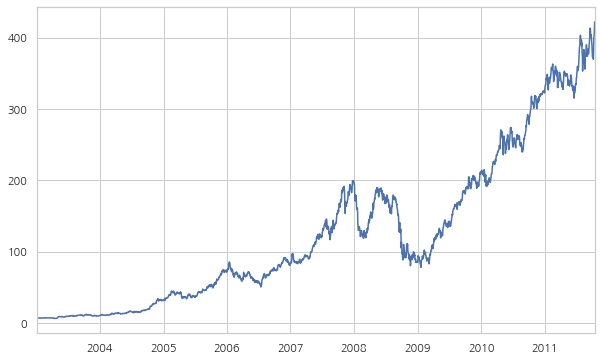

In [278]:
close_px.AAPL.plot()

<AxesSubplot:>

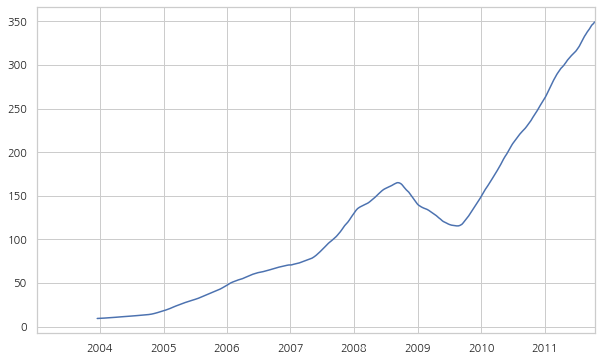

In [289]:
# 애플 주가의 250일 이동평균

# rolling(250) 이라는 표현은 groupby와 비슷해 보이지만 그룹을 생성하는 대신 250일 크기의 움직이는 창을 통해 그룹핑할 수 있는 객체를 생성한다. 
 
# 처음에는 250개를 이동하여 250번째 일자로 집계하고 그 이후에는 1일씩 증가하면서 집계 - 의미전달이 될까??? 

close_px.AAPL.rolling(250).mean()
close_px.AAPL.rolling(250).mean().plot()


In [3]:
# rolling 함수는 기본적으로 해당 윈도우 내에는 결측치가 없기를 
# 기대하지만 시계열의 시작점에서는 필연적으로 windows보다 적은 기간의 
# 데이터를 가지고 있으므로 이를 처리하기 위해 rolling함수의 동작 
# 방식은 변경될 수 있다.

# min_periods 옵션 이해하지 못함 ???
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[:20]
appl_std250.plot()

<AxesSubplot:>

In [4]:
# 확장창 평균(expanding window mean)은 시계열의 시작 지점에서부터 창의 크기가 시계열의 전체 크기가 될 때까지 점점 창의 크기를 늘린다.
# n1/1, (n1+n2)/2, (n1+n2+n3)/3, .....

expanding_mean = appl_std250.expanding().mean()


<AxesSubplot:>

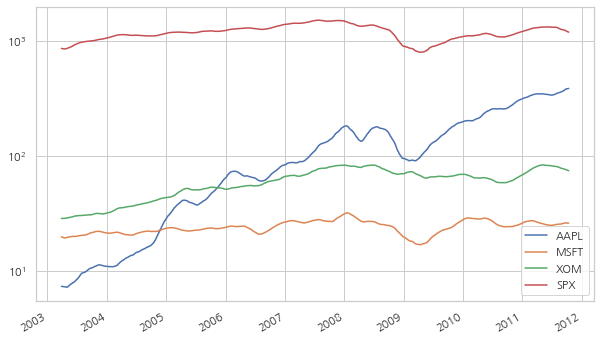

In [31]:
close_px.rolling(60).mean().plot(logy=True)

In [41]:
# rolling 함수는 고정 크기의 기간 지정 문자열을 넘겨서 호출할 수도 있다. 빈도가 불규칙한 시계열일 경유 유용하게 사용할 수 있다.

# 20일 크기의 이동평균 구하기
# 20에 미치지 못하는 경우에는 미치지 못하는 수까지의 평균
# 1st : n1/1, 2st, (n1+n2)/2, (n1+n2+n3)/3 ...  ()/20, 2st~21st/20, ..
close_px.rolling('20D').mean().head(5)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.400,21.110,29.220,909.03
2003-01-03,7.425,21.125,29.230,908.81
2003-01-06,7.450,21.520,29.960,929.01
2003-01-07,7.440,21.725,29.455,925.97
2003-01-08,7.355,21.620,28.890,916.43


### 지수 가중 함수 - Exponentially Weighted Functions
균등한 가중치를 가지는 관찰과 함께 고정 크기 창을 사용하는 다른 방법은 감쇠인자(decay factor) 상수에 좀 더 많은 가중치를 줘서 더 취근 값을 관찰하는 것이다. 감쇠인자 상수를 지정하는 방법은 몇 가지 있는데 널리 쓰는 방법은 기간을 이용하는 것이다. 이 방법은 결과를 같은 기간의 창을 가지는 단순 이동창 함수와 비교 가능하도록 해준다.

지수 가중 통계는 최근 값에 좀 더 많은 가중치를 두는 방법이므로 균등 가중 방식에 비해 좀 더 빠르게 변화를 수용한다.

pandas는 rolling이나 expanding과 함께 사용할 수 있는 ewm 연산을 제공한다. 

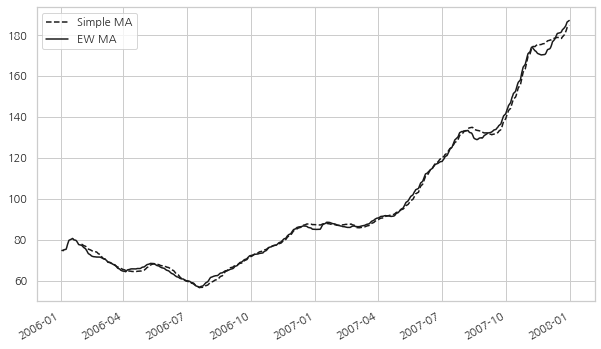

In [48]:
# 애플 주가 30일 이동평균을 span=30으로 구한 지수 가중 이동평균과 비교
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### 이진 이동창 함수 - Binary Moving Window Functions
상관관계와 공분산 같은 몇몇 통계 연산은 두 개의 시계열을 필요로 한다.

In [49]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

<AxesSubplot:>

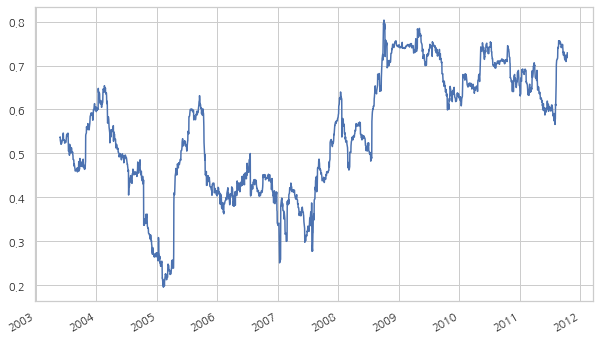

In [53]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<AxesSubplot:>

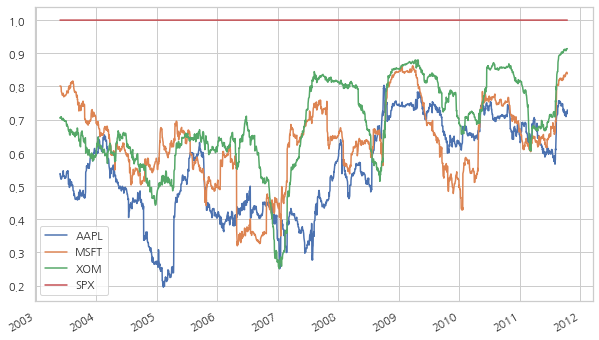

In [55]:
# 여러 주식과 S&P 500 지수와의 상관관계를 한번에 계산하고 싶다고 가정하자. 반복문을 작성해서 새로운 DataFrame을 생성하면 쉽겠지만 좋은 방법이 아니다. TimeSeries와 DataFrame 그리고 rolling_corr 같은 함수를 넘겨서 TimeSeries와 DataFrame의 각 컬럼 간의 상관관계를 계산하면 된다.

corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### 사용자 정의 이동창 함수
rolling이나 다른 관련 메서드에 apply를 호출해서 이동창에 대한 사용자 정의 연산을 수행할 수 있다. 유일한 요구사항은 사용자 정의 함수가 배열의 각 조각으로부터 단일 값(감소)을 반환해야 한다는 것이다.
예를들어, rolling(...).quantile(q)를 사용해서 표본 변위치를 계산할 수 있는 것처럼 저체 표본에서 특정 값이 차지하는 백분위 점수를 구하는 함수를 작성할 수도 있다. 

<AxesSubplot:>

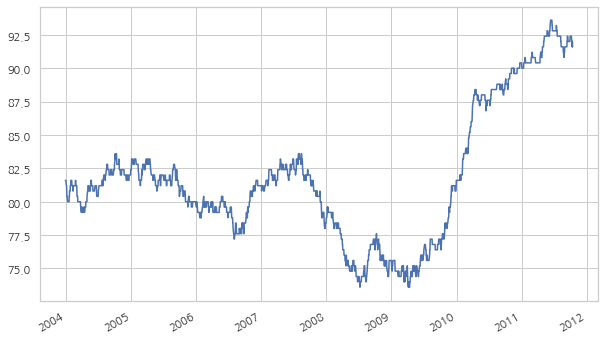

In [57]:
# 잘 모르 것어요 ???
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

# 고급 pandas - Advanced pandas

## Categorical 데이터 - Categorical Data

### 개발 배경과 동기
데이터웨어하우스, 분석 컴퓨팅 외 여러 다양한 데이터 시스템은 중복되는 데이털를 얼마나 효율적으로 저장하고 계산할 수 있는가를 중점으로 개발되었다. 데이터웨어하우스의 경우 구별되는 값을 담고있는 차원테이블과 그 테이블을 참조하는 정수키를 사용하는 것이 일반적이다.

정수로 표현된 값은 범주형 또는 사전형 표기법이라고 한다. 별개의 값을 담고 있는 배열은 범주, 사전 또는 단계 데이터라고 부른다. 이러한 종류의 데이터를 categorical 또는 범주형 데이터라 부른다. 범주형 데이터를 가리키는 정숫값은 범주 코드 또는 그냥 단순히 코드라고 한다.

범주형 표기법을 사용하면 분석 작업에 있어서 엄청난 성능 향상을 얻을 수 있다. 범주 코드를 변경하지 않은 채로 범주형 데이터를 변형하는 것도 가능하다.

비교적 적은 연산으로 수행할 수 있는 변형의 예는 다음과 같다.
* 범주형 데이터의 이름 변경하기
* 기존 범주형 데이터의 순서를 바꾸지 않고 새로운 범주 추가하기

In [58]:
import numpy as np; import pandas as pd
values = pd.Series(['apple', 'orange', 'apple',
                    'apple'] * 2)
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [59]:
pd.unique(values), pd.value_counts(values)

(array(['apple', 'orange'], dtype=object),
 apple     6
 orange    2
 dtype: int64)

In [64]:
values = pd.Series([0, 1, 0, 0] * 2)
dim = pd.Series(['apple', 'orange'])
values
dim

0     apple
1    orange
dtype: object

In [65]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

### pandas의 Categorical - Categorical Type in pandas
pandas에는 정수 기반의 범주형 데이터를 표현(또는 인코딩)할 수 있는 Categorical형이라고 하는 특수한 데이터형이 존재한다.

In [66]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2
N = len(fruits)
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': np.random.randint(3, 15, size=N),
                   'weight': np.random.uniform(0, 4, size=N)},
                  columns=['basket_id', 'fruit', 'count', 'weight'])
df

,basket_id,fruit,count,weight
0,0,apple,5,3.858058
1,1,orange,8,2.612708
2,2,apple,4,2.995627
3,3,apple,7,2.614279
4,4,apple,12,2.990859
5,5,orange,8,3.845227
6,6,apple,5,0.033553
7,7,apple,4,0.425778


In [67]:
fruit_cat = df['fruit'].astype('category')
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

In [68]:
c = fruit_cat.values
type(c)

pandas.core.arrays.categorical.Categorical

In [70]:
c.categories, c.codes

(Index(['apple', 'orange'], dtype='object'),
 array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8))

In [71]:
df['fruit'] = df['fruit'].astype('category')
df.fruit

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   basket_id  8 non-null      int32   
 1   fruit      8 non-null      category
 2   count      8 non-null      int32   
 3   weight     8 non-null      float64 
dtypes: category(1), float64(1), int32(2)
memory usage: 388.0 bytes


In [73]:
df[:3]

,basket_id,fruit,count,weight
0,0,apple,5,3.858058
1,1,orange,8,2.612708
2,2,apple,4,2.995627


In [74]:
# 파이선 리스트에서 pandas.Categorical형 생성
my_categories = pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bar'])
my_categories

['foo', 'bar', 'baz', 'foo', 'bar']
Categories (3, object): ['bar', 'baz', 'foo']

In [75]:
# 기존 정의된 범주와 범주 코드가 있다면 from_codes 함수를 이용해서 범주형 데이터를 생성
categories = ['foo', 'bar', 'baz']
codes = [0, 1, 2, 0, 0, 1]
my_cats_2 = pd.Categorical.from_codes(codes, categories)
my_cats_2

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo', 'bar', 'baz']

In [76]:
# 범주형으로 변경하는 경우 명시적으로 지정하지 않는 한 특정 순서를 보장하지 않는다. 따라서, categories 배열은 입력 데이터의 순서에 따라 다른 순서를 나타낼 수 있다. from_codes를 사용하거나 다른 범주형 데이터 생성자를 이용하는 경우 순서를 지정할 수 있다.
ordered_cat = pd.Categorical.from_codes(codes, categories,
                                        ordered=True)
ordered_cat

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

In [77]:
# 순서가 없는 범주형 인스턴스는 as_ordered 메서드를 이용해 순서를 가지도록 할 수 있다.
my_cats_2.as_ordered()

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

In [ ]:
# 범주형 데이터는 꼭 문자열일 필요는 없다. 범주형 배열은 변경이 불가능한 값이라면 어떤 자료형이라도 포함할 수 있다.

### Categorical 연산 - Computations with Categoricals
pandas에서 Categorical은 문자열 배열처럼 인코딩되지 않은 자료형을 사용하는 방식과 거의 유사하게 사용할 수 있다. groupby 같은 일부 pandas 함수는 범주형 데이터에 사용할 때 더 나은 성능을 보여준다.
ordered 플래그를 활용하는 함수들도 마찬가지이다.

In [78]:
np.random.seed(12345)
draws = np.random.randn(1000)
draws[:5]

array([-0.20470766,  0.47894334, -0.51943872, -0.5557303 ,  1.96578057])

In [85]:
# 사분위로 나누고 통계 작성
bins = pd.qcut(draws, 4)
bins

[(-0.684, -0.0101], (-0.0101, 0.63], (-0.684, -0.0101], (-0.684, -0.0101], (0.63, 3.928], ..., (-0.0101, 0.63], (-0.684, -0.0101], (-2.9499999999999997, -0.684], (-0.0101, 0.63], (0.63, 3.928]]
Length: 1000
Categories (4, interval[float64]): [(-2.9499999999999997, -0.684] < (-0.684, -0.0101] < (-0.0101, 0.63] < (0.63, 3.928]]

In [86]:
# 사분위 이름을 실제 데이터로 지정하는 것은 별로 유용하지 않아 보인다. qcut 함수의 labels 인자로 직접 이름을 지정하자.
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
print(bins)
bins.codes[:10]

['Q2', 'Q3', 'Q2', 'Q2', 'Q4', ..., 'Q3', 'Q2', 'Q1', 'Q3', 'Q4']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']


array([1, 2, 1, 1, 3, 3, 2, 2, 3, 3], dtype=int8)

In [88]:
# bins에 이름을 붙이고 나면 데이터의 시작값과 끝값에 대한 정보를 포함하지 않으므로 groupby를 이용해서 요약통계 출력
bins = pd.Series(bins, name='quartile')
results = (pd.Series(draws)
           .groupby(bins)
           .agg(['count', 'min', 'max'])
           .reset_index())
results

,quartile,count,min,max
0,Q1,250,-2.949343,-0.685484
1,Q2,250,-0.683066,-0.010115
2,Q3,250,-0.010032,0.628894
3,Q4,250,0.634238,3.927528


In [89]:
# quartile 컬럼은 bins의 순서를 포함한 원래 범주 정보를 유지하고 있다.
results['quartile']

0    Q1
1    Q2
2    Q3
3    Q4
Name: quartile, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

#### categorical을 이용한 성능 개선
특정 데이터셋에 대해 다양한 분석을 하는 경우 범주형으로 변환하는 것만으로도 전체 성능을 개선할 수 있다. 범주형으로 변환한 DataFrame의 컬럼은 메모리도 훨씬 적게 사용한다.

In [90]:
N = 10000000
draws = pd.Series(np.random.randn(N))
labels = pd.Series(['foo', 'bar', 'baz', 'qux'] * (N // 4))

In [93]:
# labels를 categorical로 변환
categories = labels.astype('category')


In [95]:
# 일반 Series와 categorical 과의 메모리 사용 비교
labels.memory_usage(), categories.memory_usage()

(80000128, 10000332)

In [98]:
# 범주형으로 변환하는 과정이 그냥 이루어지는 것은 아니지만 이는 한 번만 변환하면 되는 일회성 비용이다. 또한, 범주형에 대한 그룹 연산은 문자열 배열을 사용하는 대신 정수 기반의 코드 배열을 사용하는 알고리즘으로 동작하므로 훨씬 빠르게 동작한다.
%time _ = labels.astype('category')

Wall time: 669 ms


### Categorical 메서드 - Categorical Methods
범주형 데이터를 담고 있는 Series는 특화된 문자열 메서드인 Series.str과 유사한 몇가지 특수 메서드를 제공한다. 이를 통해 categories와 codes에 쉽게 접근할 수 있다.

In [99]:
s = pd.Series(['a', 'b', 'c', 'd'] * 2)
cat_s = s.astype('category')
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [100]:
# 특별한 속성인 cat을 통해 categorical 메서드에 접근할 수 있다.
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [101]:
cat_s.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

In [102]:
# 이 데이터의 실제 카테고리가 데이터에서 관측되는 4종류를 넘는 것을 이미 알고 있다고 가정하자. 이 경우 set_categories 메서드를 이용해서 변경 가능하다.
actual_categories = ['a', 'b', 'c', 'd', 'e']
cat_s2 = cat_s.cat.set_categories(actual_categories)
cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

In [105]:
# 데이터는 변함이 없지만 위에서 변경한 대로 새로운 카테고리가 추가되었다. 예를 들어 value_counts를 호출해 보면 변경된 카테고리를 반영하고 있다.
cat_s.value_counts()

a    2
b    2
c    2
d    2
dtype: int64

In [107]:
cat_s2.value_counts()

a    2
b    2
c    2
d    2
e    0
dtype: int64

In [115]:
# 큰 데이터셋을 다룰 경우 categorical을 이용하면 메모리와 성능을 개선할 수 있다. 분석 과정에서 큰 DataFrame이나 Series를 한 번 걸러내고 나면 실제로 데이터에는 존재하지 않는 카테고리가 남아 있을 수 있다. 이 경우 remove_unused_categories 메서드를 이용해서 관측되지 않는 카테고리를 제거할 수 있다.
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]
cat_s3
cat_s3.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): ['a', 'b']

#### 모델링을 위한 더미값 생성하기 - Creating dummy variables for modeling
통계나 머신러닝 도구를 사용하다 보면 범주형 데이터를 더미값으로 변환(원핫 인코딩이라고도 함)해야 하는 경우가 생긴다. 이를 위해 각각의 구별되는 카테고리를 컬럼으로 가지는 DataFrame을 생성하는데, 각 컬럼에는 해당 카테고리 여부에 따라 0과 1의 값을 가지게 된다.

In [117]:
cat_s = pd.Series(['a', 'b', 'c', 'd'] * 2, dtype='category')

In [118]:
# pandas.get_dummies 함수는 이런 1차원 범주형 데이터를 더미값을 가지는 DataFrame으로 변환한다.
pd.get_dummies(cat_s)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


## 고급 GroupBy 사용 - Advanced GroupBy Use

### 그룹 변환과 GroupBy 객체 풀어내기 - Group Transforms and "Unwrapped" GroupBys

In [2]:
df = pd.DataFrame({'key': ['a', 'b', 'c'] * 4,
                   'value': np.arange(12.)})
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [8]:
# .value를 사용하면 pd.Series로 반환, .value를 제거하면 DataFrame으로 반환
g = df.groupby('key').value 
g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [9]:
g.transform(lambda x: x.mean())


0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [10]:
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [11]:
g.transform(lambda x: x * 2)

0      0.0
1      2.0
2      4.0
3      6.0
4      8.0
5     10.0
6     12.0
7     14.0
8     16.0
9     18.0
10    20.0
11    22.0
Name: value, dtype: float64

In [12]:
g.transform(lambda x: x.rank(ascending=False))


0     4.0
1     4.0
2     4.0
3     3.0
4     3.0
5     3.0
6     2.0
7     2.0
8     2.0
9     1.0
10    1.0
11    1.0
Name: value, dtype: float64

In [14]:
def normalize(x):
    return (x - x.mean()) / x.std()

In [15]:
g.transform(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [16]:
g.apply(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [18]:
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [17]:
normalized = (df['value'] - g.transform('mean')) / g.transform('std')
normalized

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

### Grouped Time Resampling

In [19]:
N = 15
times = pd.date_range('2017-05-20 00:00', freq='1min', periods=N)
df = pd.DataFrame({'time': times,
                   'value': np.arange(N)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [20]:
df.set_index('time').resample('5min').count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [22]:
df2 = pd.DataFrame({'time': times.repeat(3),
                    'key': np.tile(['a', 'b', 'c'], N),
                    'value': np.arange(N * 3.)})
df2[:7]

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


In [28]:
# pd.TimeGrouper() was Deprecated ???
time_key = pd.TimeGrouper('5min')

In [30]:
# ???
resampled = (df2.set_index('time')
             .groupby(['key', time_key])
             .sum())
resampled
resampled.reset_index()

KeyError: 'The grouper name 5min is not found'